# Enterprise Data Science Bootcamp Project
### Enterprise Data Science & Analytics 2025

---

### Team Members:
- **Daniel Almeida** (20241154)
- **Gonçalo Dias** (20240819)
- **Miguel Almeida** (20241151)

In [255]:
%run ../utils/configuration.ipynb

In [256]:
import sys
import polars as pl

In [257]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

In [258]:
try:
    df = pl.read_parquet(train_path)
except Exception as e:
    print(f"Error: {e}")
    sys.exit(1)


In [259]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

<a class="anchor" id="1st-bullet">
# 1. Data Collection and Initial Processing & Exploratory Data Analysis
</a>

In [260]:
df.shape

(5634, 50)

In [261]:
#df.index

In [262]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,i64,i64,str,str,f64,str,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,i64,f64,f64,str,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,i64,str,str,i64,i64,i64,str,str,i64


In [263]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [264]:
df.describe()

statistic,customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,str,str,f64,f64,str,str,f64,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,f64,str,f64,f64,f64,str,f64,str,str,f64,f64,f64,str,str,f64
"""count""","""5634""","""5634""",5634.0,5634.0,"""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""",5634.0,"""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""","""5634""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,"""5634""",5634.0,0.0,5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""",5634.0,5634.0,5634.0,"""5634""",5634.0,"""5634""","""5634""",5634.0,5634.0,5634.0,"""5634""","""5634""",5634.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""","""0""",0.0,"""0""","""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,"""0""",0.0,5634.0,0.0,0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,"""0""",0.0,"""0""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,null,1.974973,32.349485,null,null,22.847932,null,null,null,20.611289,null,null,null,null,null,null,null,null,null,null,null,64.613472,2271.76962,1.913119,6.888534,743.208774,3019.953809,null,46.452609,null,0.160277,0.484026,0.479411,null,93468.756656,null,36.175273,-119.733871,1.0,null,3.253816,null,null,0.261981,58.333333,4391.604366,null,null,22209.385162
"""std""",null,null,3.01689,24.515685,null,null,15.442433,null,null,null,20.582994,null,null,null,null,null,null,null,null,null,null,null,30.069162,2261.000454,7.8362,25.249882,845.202523,2863.851137,null,16.751088,null,0.366895,0.499789,0.970551,null,1850.131447,null,2.471376,2.164395,0.0,null,1.199965,null,null,0.439751,21.110035,1181.145258,null,null,21074.277823
"""min""","""0002-ORFBO""","""No""",0.0,1.0,"""None""","""No""",0.0,"""No""","""No""","""Cable""",0.0,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-Month""","""No""","""Bank Withdrawal""",18.25,18.8,0.0,0.0,0.0,21.4,"""Female""",19.0,null,0.0,0.0,0.0,"""Acampo""",90001.0,"""32.555828, -117.040073""",32.555828,-124.301372,1.0,"""Q3""",1.0,"""Churned""","""No""",0.0,5.0,2003.0,"""Attitude""","""Attitude of service provider""",11.0
"""25%""",null,null,0.0,9.0,null,null,9.07,null,null,null,3.0,null,null,null,null,null,null,null,null,null,null,null,35.5,395.6,0.0,0.0,71.46,596.85,null,32.0,null,0.0,0.0,0.0,null,92086.0,null,33.982787,-121.795867,1.0,null,3.0,null,null,0.0,40.0,3461.0,null,null,2355.0
"""50%""",null,null,0.0,29.0,null,null,22.74,null,null,null,17.0,null,null,null,null,null,null,null,null,null,null,null,70.3,1394.55,0.0,0.0,394.47,2096.12,null,46.0,null,0.0,0.0,0.0,null,93505.0,null,36.008958,-119.505661,1.0,null,3.0,null,null,0.0,61.0,4510.0,null,null,17929.0
"""75%""",null,null,3.0,55.0,null,null,36.24,null,null,null,27.0,null,null,null,null,null,null,null,null,null,null,null,89.75,3741.85,0.0,0.0,1172.5,4739.95,null,60.0,null,0.0,1.0,0.0,null,95318.0,null,38.123544,-117.955054,1.0,null,4.0,null,null,1.0,75.0,5366.0,null,null,36123.0
"""max""","""9995-HOTOH""","""Yes""",11.0,72.0,"""Offer E""","""Yes""",49.99,"""Yes""","""Yes""","""None""",85.0,"""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two Year""","""Yes""","""Mailed Check""",

In [265]:
df.schema

Schema([('customer_id', String),
        ('referred_a_friend', String),
        ('number_of_referrals', Int64),
        ('tenure_in_months', Int64),
        ('offer', String),
        ('phone_service', String),
        ('avg_monthly_long_distance_charges', Float64),
        ('multiple_lines', String),
        ('internet_service', String),
        ('internet_type', String),
        ('avg_monthly_gb_download', Int64),
        ('online_security', String),
        ('online_backup', String),
        ('device_protection_plan', String),
        ('premium_tech_support', String),
        ('streaming_tv', String),
        ('streaming_movies', String),
        ('streaming_music', String),
        ('unlimited_data', String),
        ('contract', String),
        ('paperless_billing', String),
        ('payment_method', String),
        ('monthly_charge', Float64),
        ('total_charges', Float64),
        ('total_refunds', Float64),
        ('total_extra_data_charges', Int64),
        ('total_lo

In [266]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [267]:
df.select(pl.all().n_unique())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
5634,2,12,72,6,2,3184,2,2,4,50,2,2,2,2,2,2,2,2,3,2,3,1478,5305,390,16,4926,5607,2,62,1,2,2,9,1103,1621,1657,1621,1620,1,1,5,3,2,2,81,3105,6,21,1564


In [268]:
for col in df.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 8661-BOYNW  │
│ 4367-NHWMM  │
│ 6907-CQGPN  │
│ 2831-EBWRN  │
│ 8750-QWZAJ  │
│ …           │
│ 6458-CYIDZ  │
│ 1472-TNCWL  │
│ 6351-SCJKT  │
│ 3744-ZRRDZ  │
│ 5656-MJEFC  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 9                   │
│ 3                   │
│ 6                   │
│ 0                   │
│ 10                  │
│ …                   │
│ 1                   │
│ 2                   │
│ 8                   │
│ 5                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_mo

In [269]:
df.select(pl.col(pl.NUMERIC_DTYPES)).describe()

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\3086008548.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df.select(pl.col(pl.NUMERIC_DTYPES)).describe()


statistic,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,under_30,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,0.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0,5634.0
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5634.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",1.974973,32.349485,22.847932,20.611289,64.613472,2271.76962,1.913119,6.888534,743.208774,3019.953809,46.452609,null,0.160277,0.484026,0.479411,93468.756656,36.175273,-119.733871,1.0,3.253816,0.261981,58.333333,4391.604366,22209.385162
"""std""",3.01689,24.515685,15.442433,20.582994,30.069162,2261.000454,7.8362,25.249882,845.202523,2863.851137,16.751088,null,0.366895,0.499789,0.970551,1850.131447,2.471376,2.164395,0.0,1.199965,0.439751,21.110035,1181.145258,21074.277823
"""min""",0.0,1.0,0.0,0.0,18.25,18.8,0.0,0.0,0.0,21.4,19.0,null,0.0,0.0,0.0,90001.0,32.555828,-124.301372,1.0,1.0,0.0,5.0,2003.0,11.0
"""25%""",0.0,9.0,9.07,3.0,35.5,395.6,0.0,0.0,71.46,596.85,32.0,null,0.0,0.0,0.0,92086.0,33.982787,-121.795867,1.0,3.0,0.0,40.0,3461.0,2355.0
"""50%""",0.0,29.0,22.74,17.0,70.3,1394.55,0.0,0.0,394.47,2096.12,46.0,null,0.0,0.0,0.0,93505.0,36.008958,-119.505661,1.0,3.0,0.0,61.0,4510.0,17929.0
"""75%""",3.0,55.0,36.24,27.0,89.75,3741.85,0.0,0.0,1172.5,4739.95,60.0,null,0.0,1.0,0.0,95318.0,38.123544,-117.955054,1.0,4.0,1.0,75.0,5366.0,36123.0
"""max""",11.0,72.0,49.99,85.0,118.65,8684.8,49.79,150.0,3564.0,11979.34,80.0,null,1.0,1.0,8.0,96150.0,41.962127,-114.192901,1.0,5.0,1.0,96.0,6499.0,105285.0


In [270]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


In [271]:
df_numerical_variables.columns

['number_of_referrals',
 'tenure_in_months',
 'avg_monthly_long_distance_charges',
 'avg_monthly_gb_download',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'zip_code',
 'latitude',
 'longitude',
 'count',
 'satisfaction_score',
 'churn_value',
 'churn_score',
 'cltv',
 'population']

In [272]:
df_numerical_variables = df_numerical_variables.drop(['under_30']) if 'under_30' in df_numerical_variables.columns else df_numerical_variables


In [273]:
df_numerical_variables

number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,age,senior_citizen,married,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
i64,i64,f64,i64,f64,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64
1,72,35.04,22,109.75,8075.35,0.0,0,2522.88,10598.23,73,1,1,0,92114,32.707892,-117.05512,1,4,0,34,6010,66838
0,56,48.63,0,21.2,1238.65,0.0,0,2723.28,3961.93,38,0,0,0,92627,33.645672,-117.922613,1,4,0,23,6473,62069
0,6,12.67,20,74.1,450.9,0.0,0,76.02,526.92,65,1,0,0,95421,38.578807,-123.19338,1,3,0,79,4716,1575
6,23,38.93,4,54.25,1221.55,0.0,0,895.39,2116.94,47,0,1,0,95554,40.267158,-123.805913,1,5,0,49,5140,644
0,33,0.0,12,34.05,1113.95,0.0,0,0.0,1113.95,64,0,0,2,95627,38.834469,-122.127193,1,3,0,73,3044,2756
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,1,43.06,9,83.4,83.4,0.0,0,43.06,126.46,49,0,0,0,94555,37.555473,-122.080312,1,3,0,26,5960,33883
0,3,49.4,10,88.35,262.05,0.0,0,148.2,410.25,33,0,0,0,95240,38.123544,-121.159078,1,2,1,93,5202,45755
0,51,18.07,0,24.75,1234.6,0.0,0,921.57,2156.17,63,0,0,0,94547,37.991259,-122.214945,1,3,0,46,5080,22479


C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\1736945150.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


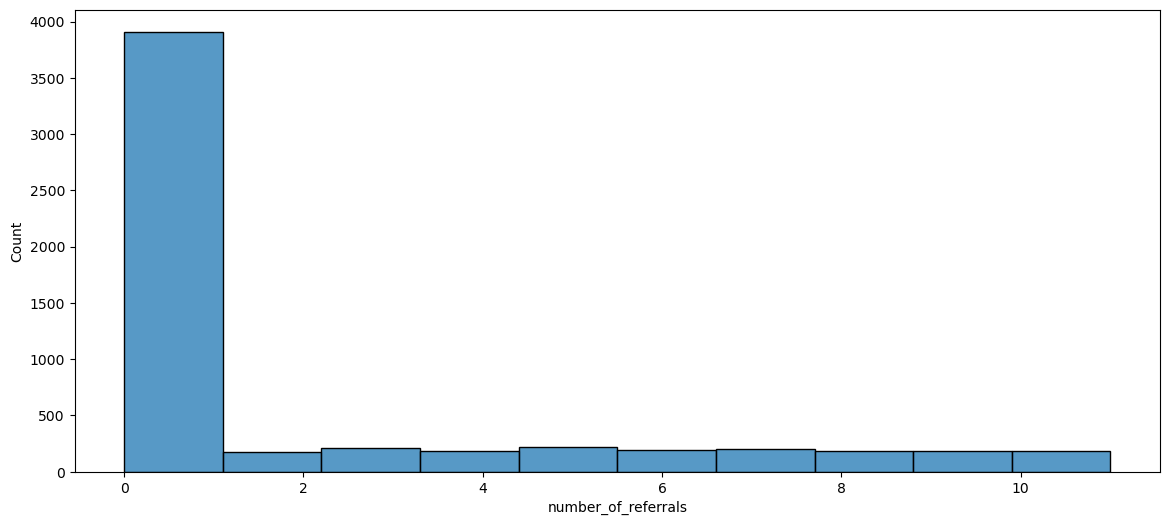

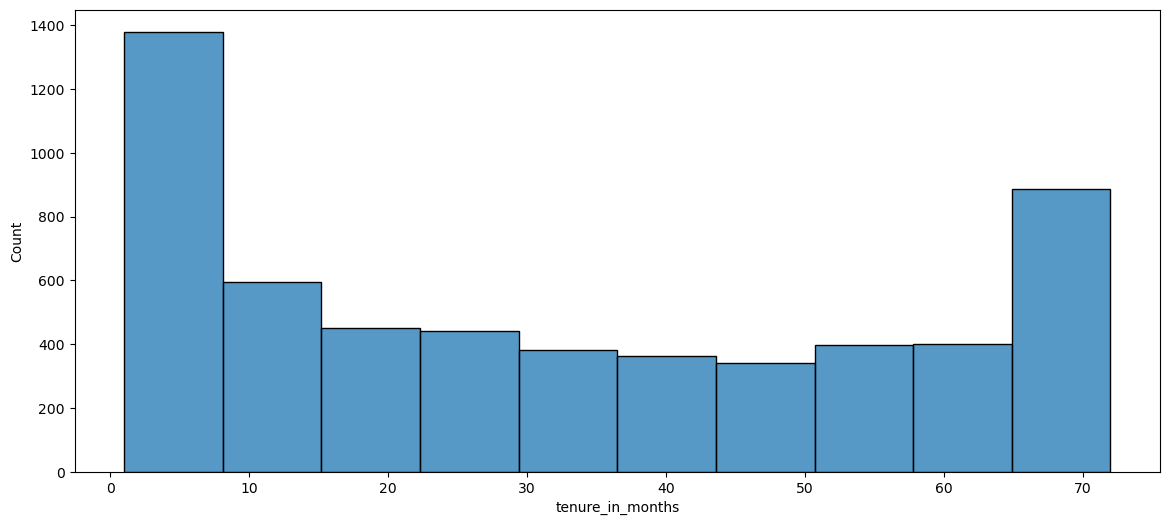

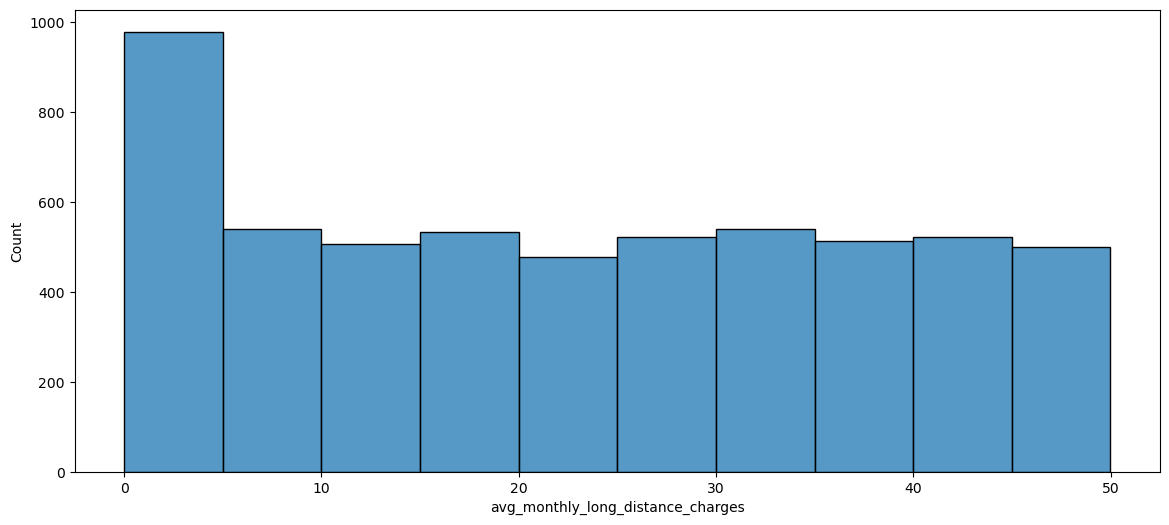

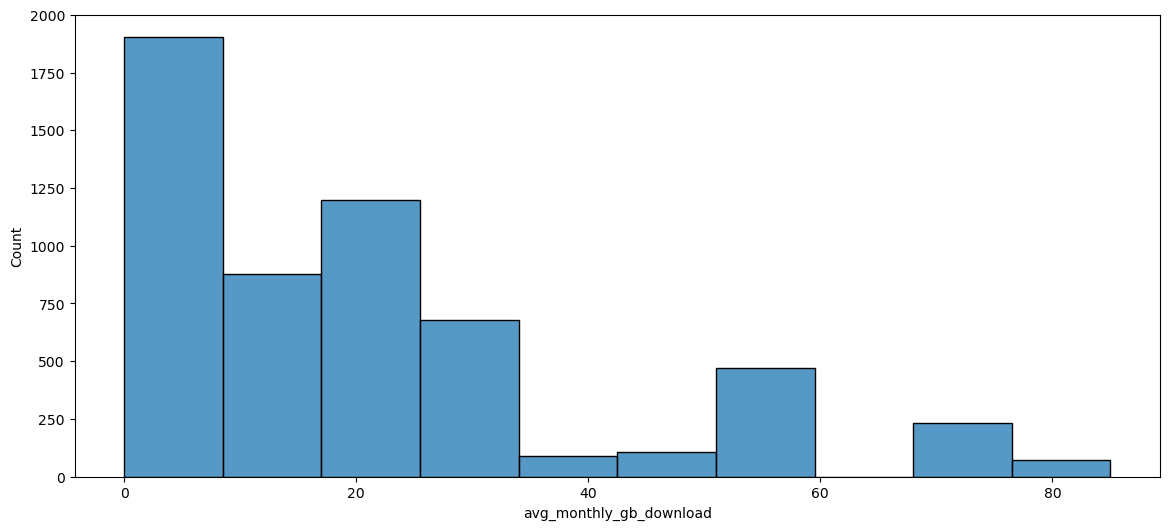

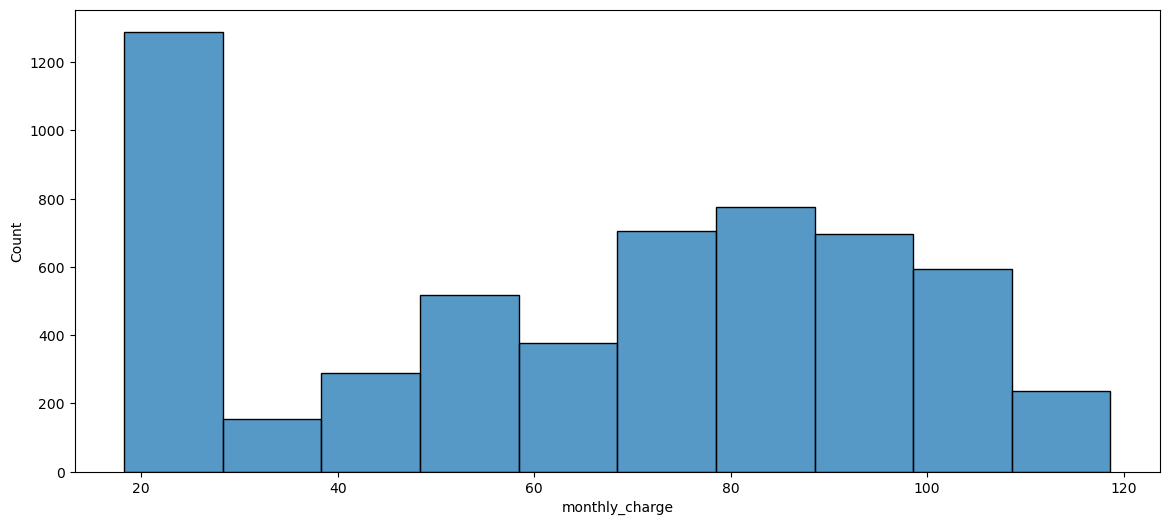

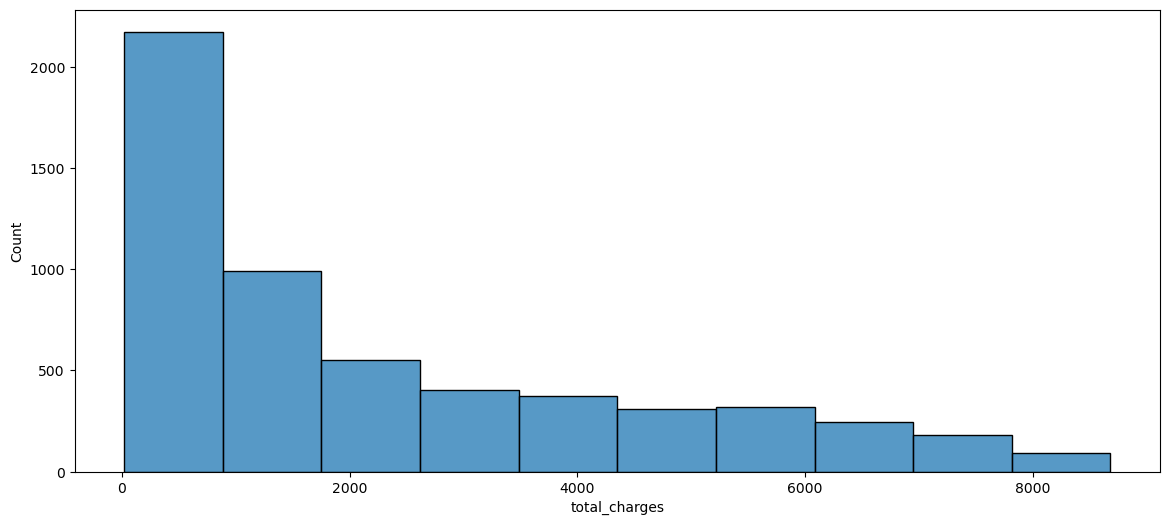

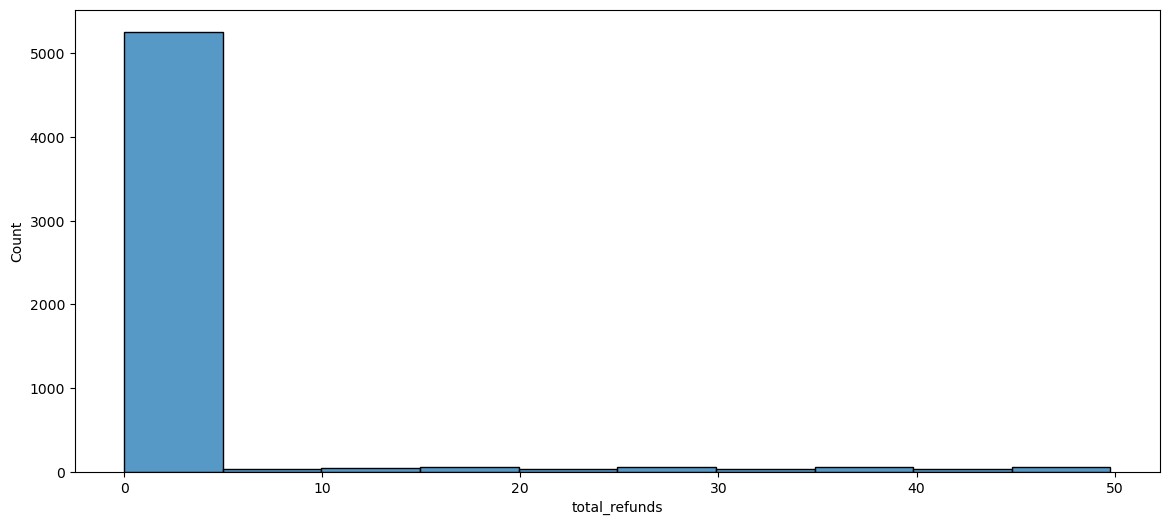

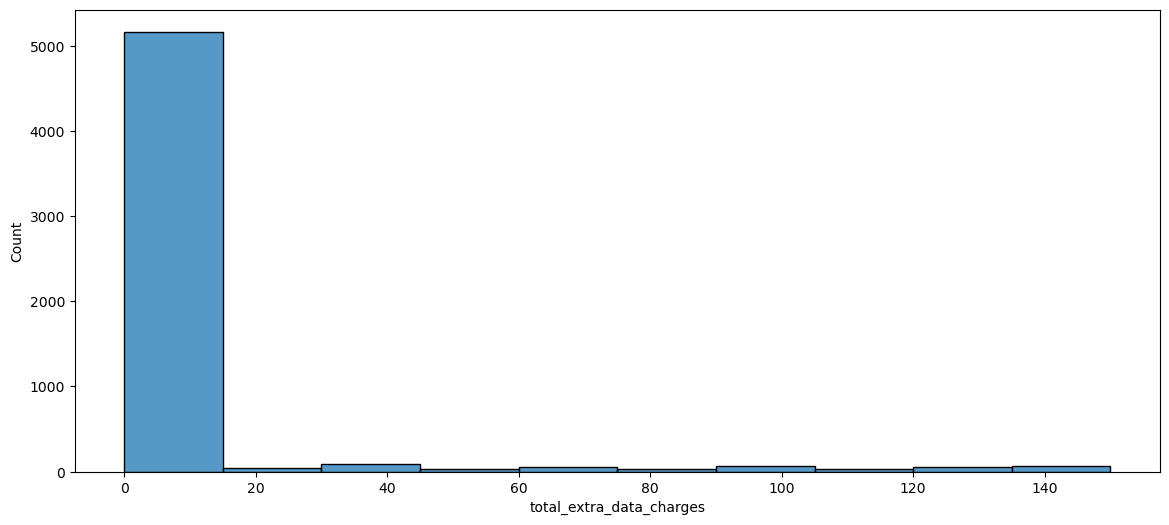

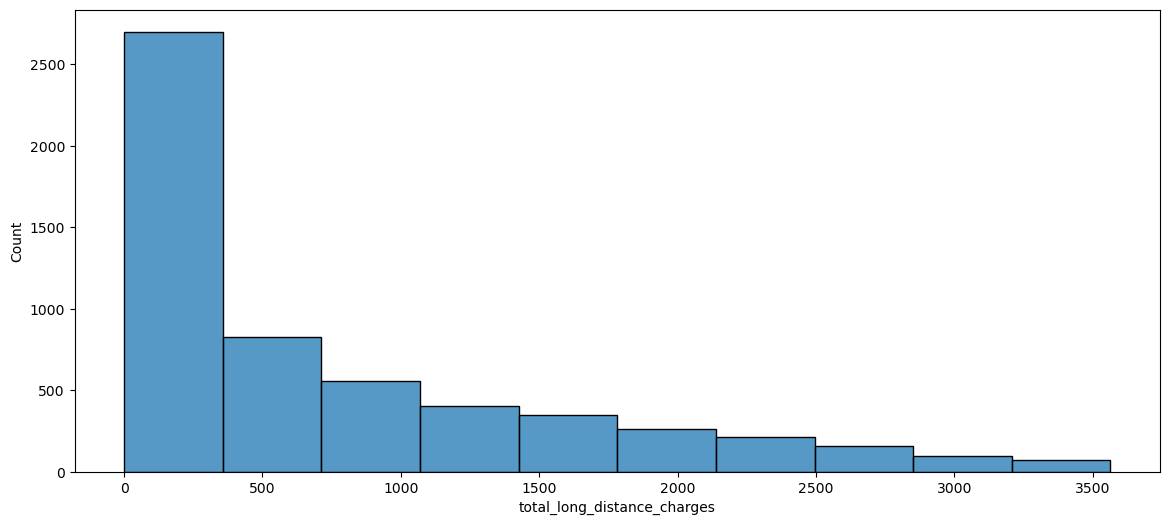

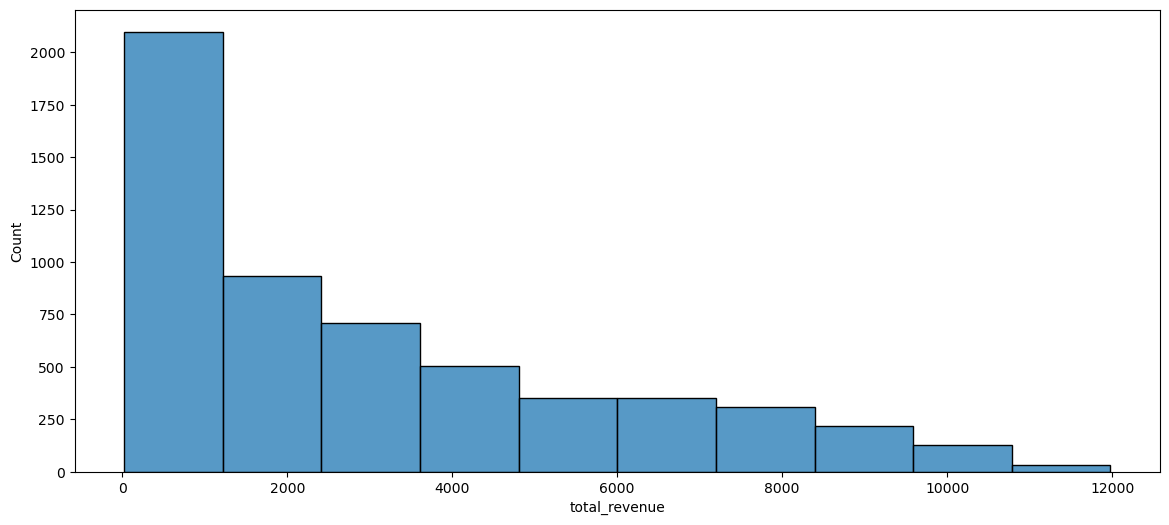

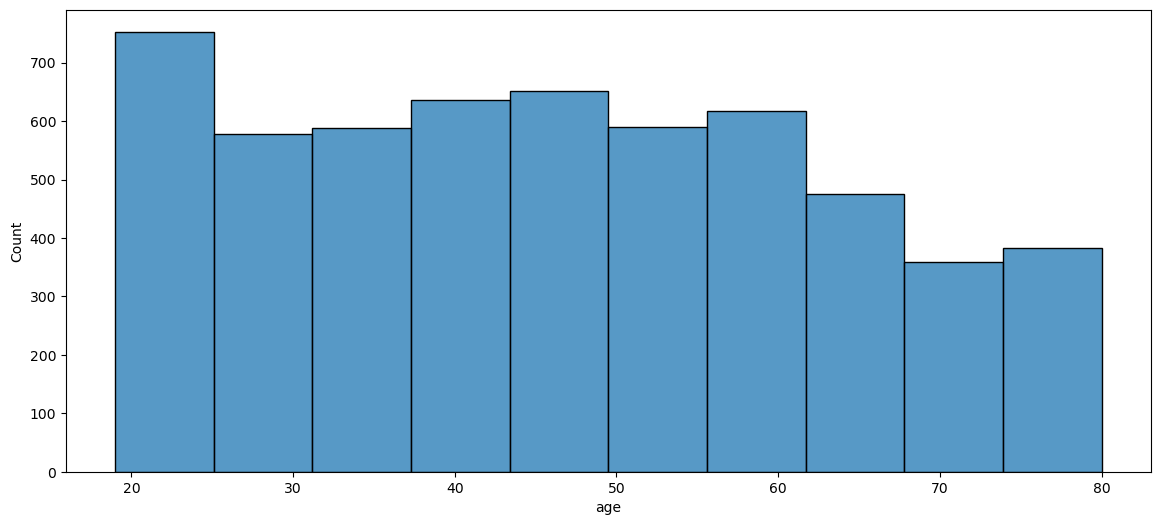

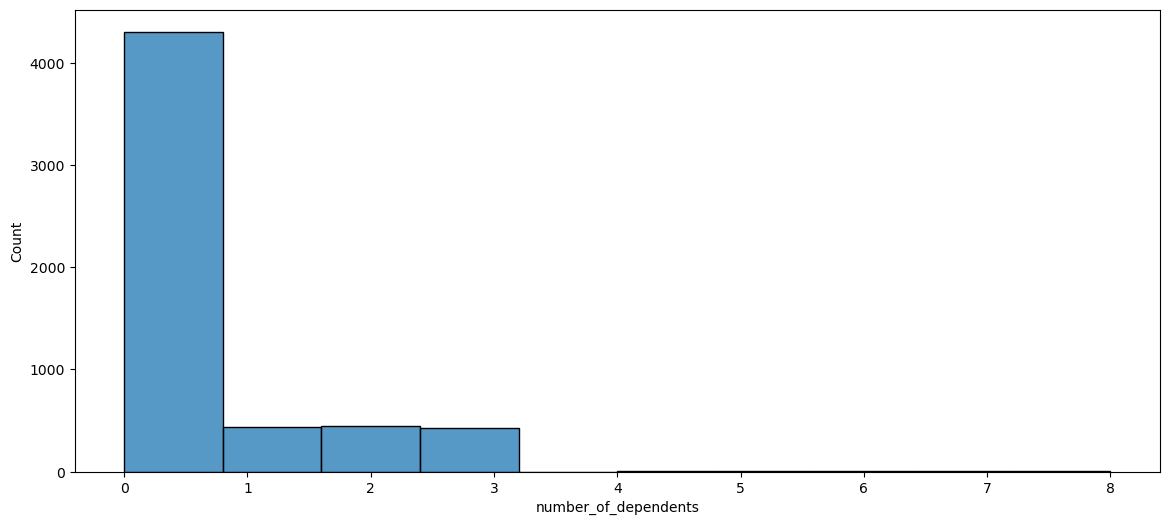

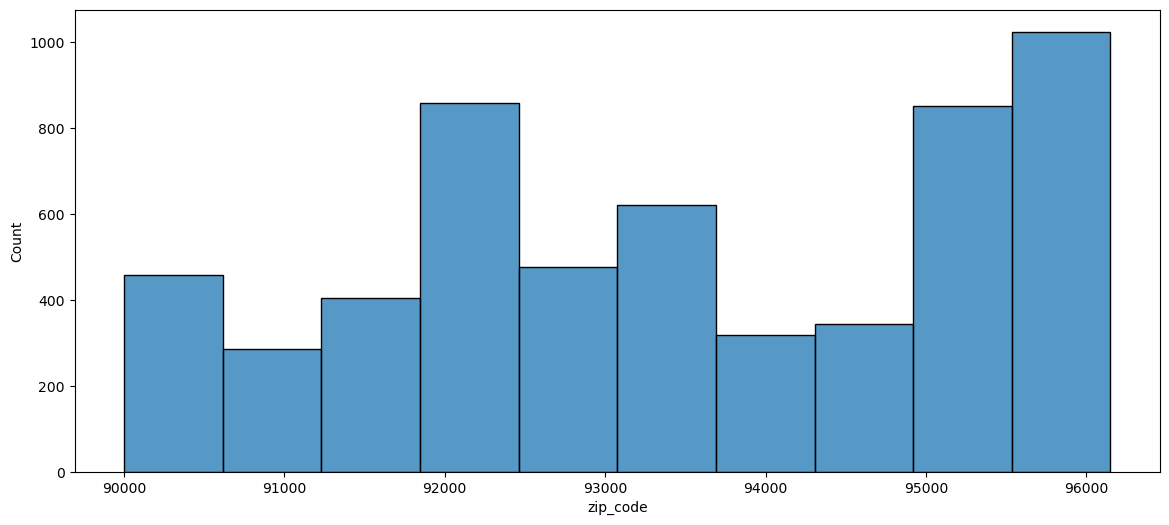

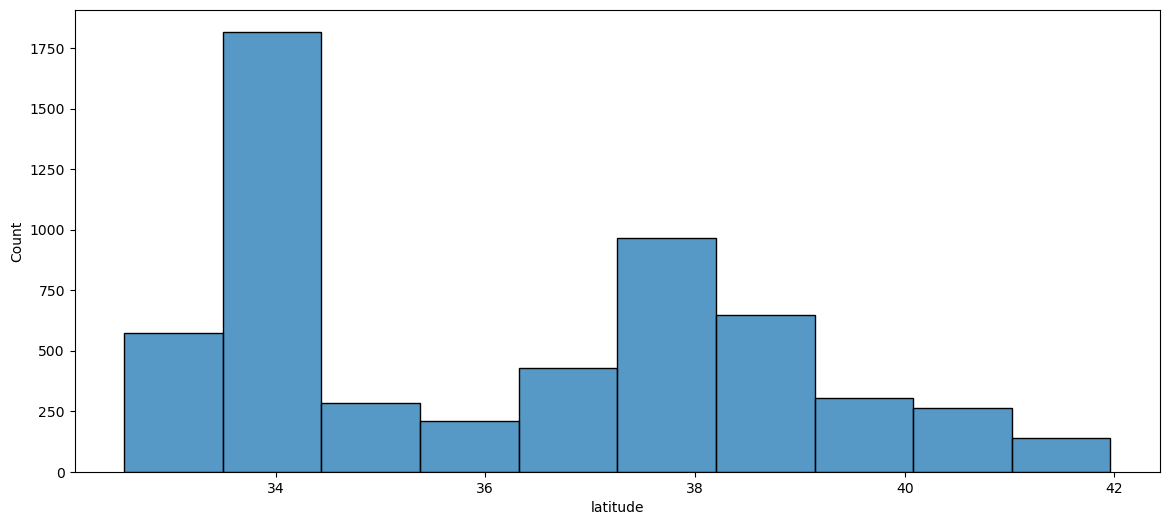

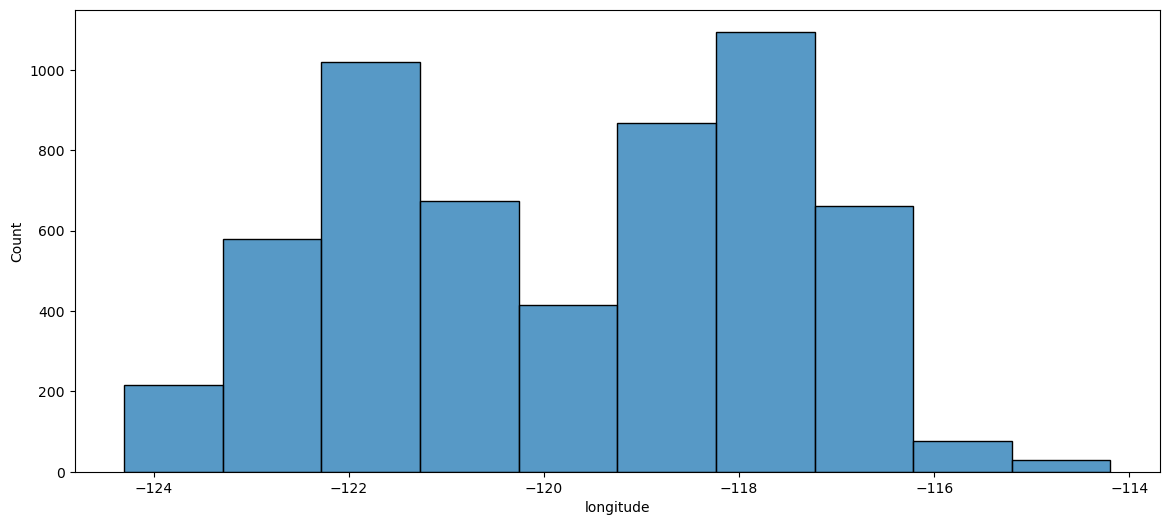

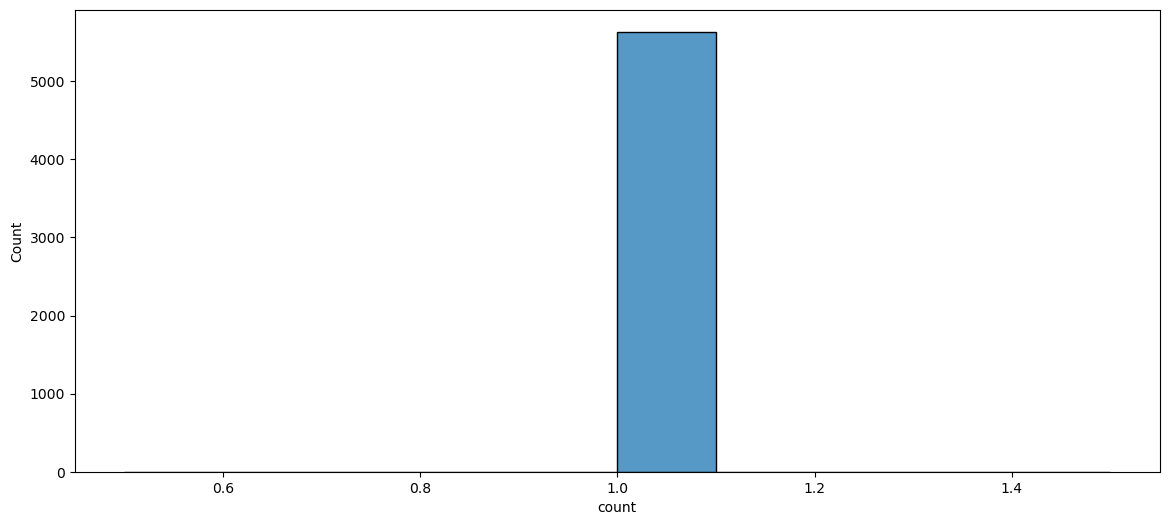

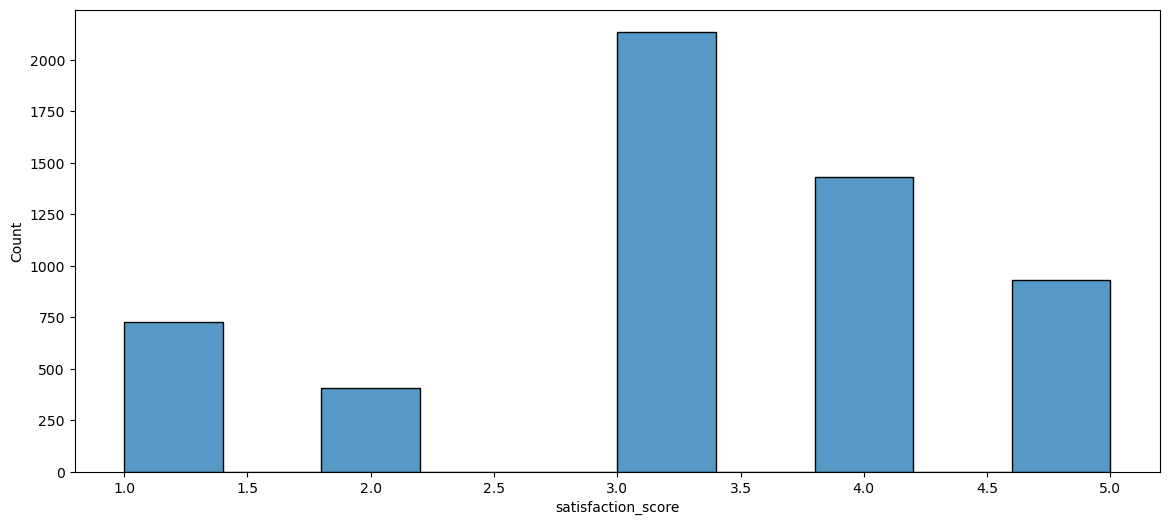

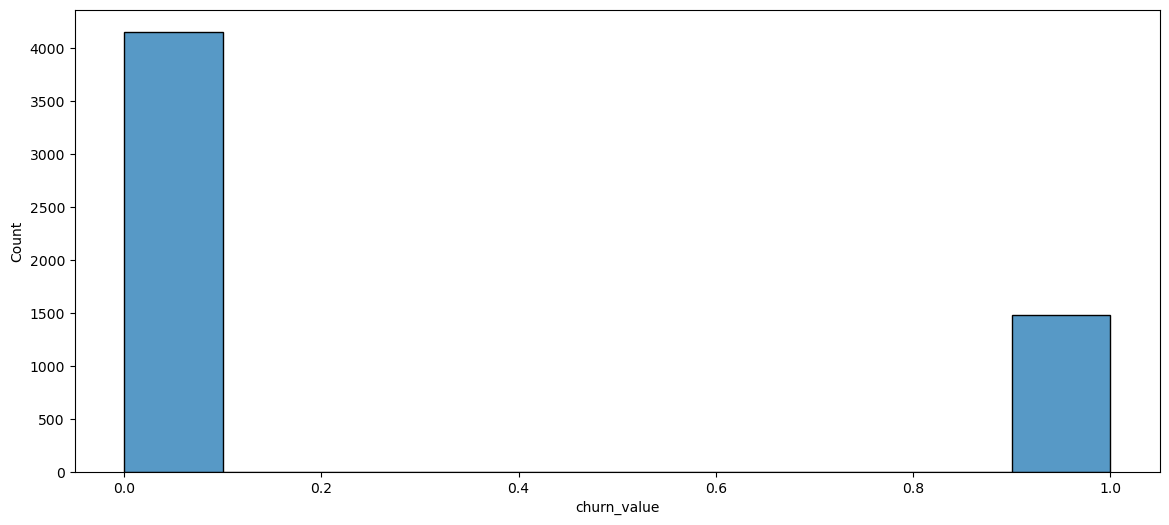

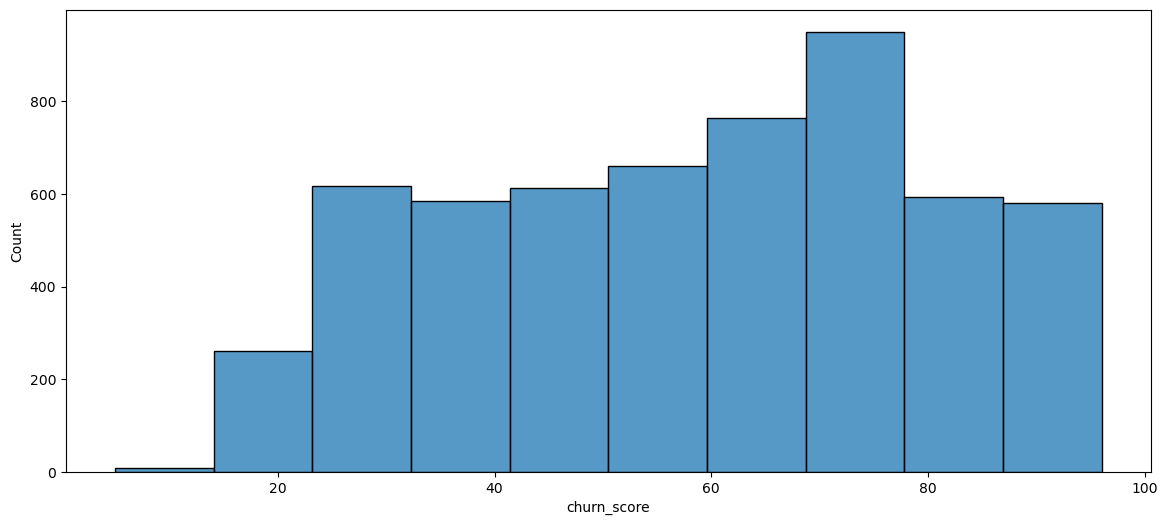

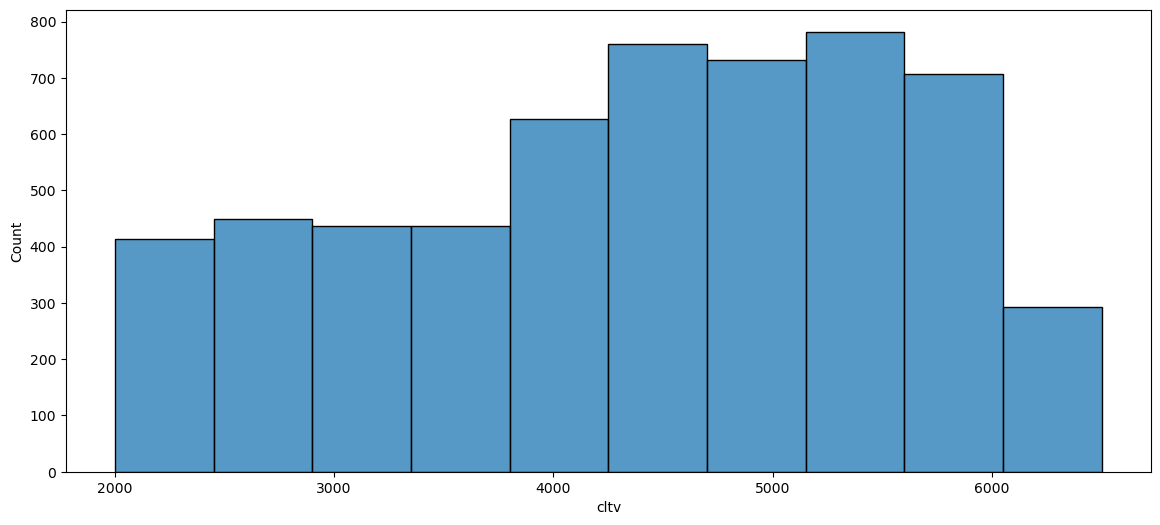

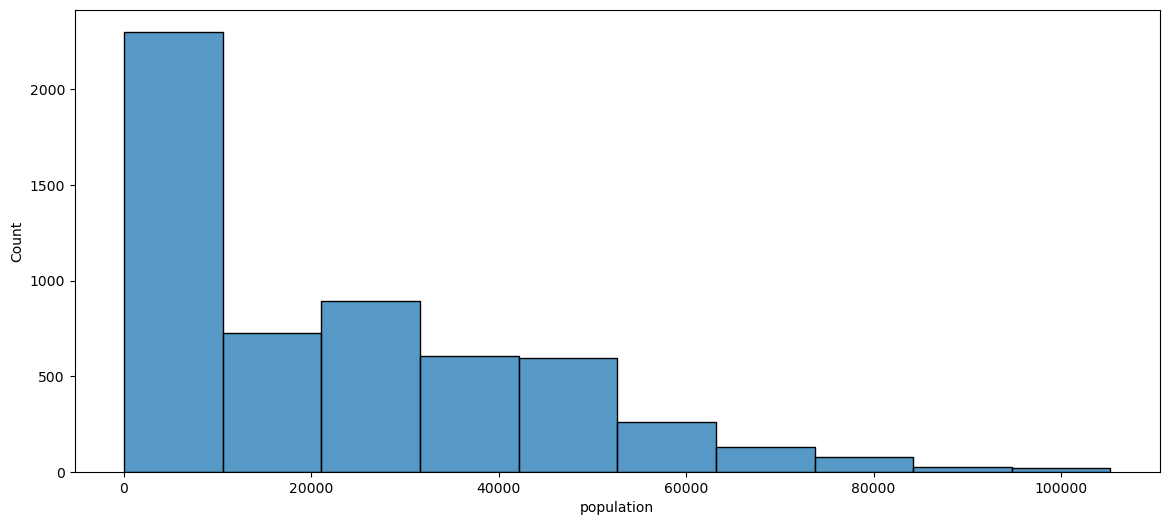

In [274]:
bivalue_columns_x = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    ,'senior_citizen'
    ,'married'
]
for col in df_numerical_variables.columns:
    if col in bivalue_columns_x:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6)) 
    sns.histplot(ax = ax1, data = df_numerical_variables.to_pandas(), x = col, bins = 10) #df_numerical_variables.to_pandas



In [275]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns_x:
        continue
    print(f"Coluna: {col}")

Coluna: number_of_referrals
Coluna: tenure_in_months
Coluna: avg_monthly_long_distance_charges
Coluna: avg_monthly_gb_download
Coluna: monthly_charge
Coluna: total_charges
Coluna: total_refunds
Coluna: total_extra_data_charges
Coluna: total_long_distance_charges
Coluna: total_revenue
Coluna: age
Coluna: number_of_dependents
Coluna: zip_code
Coluna: latitude
Coluna: longitude
Coluna: count
Coluna: satisfaction_score
Coluna: churn_value
Coluna: churn_score
Coluna: cltv
Coluna: population


Correlation between Numerical Variables

<Axes: >

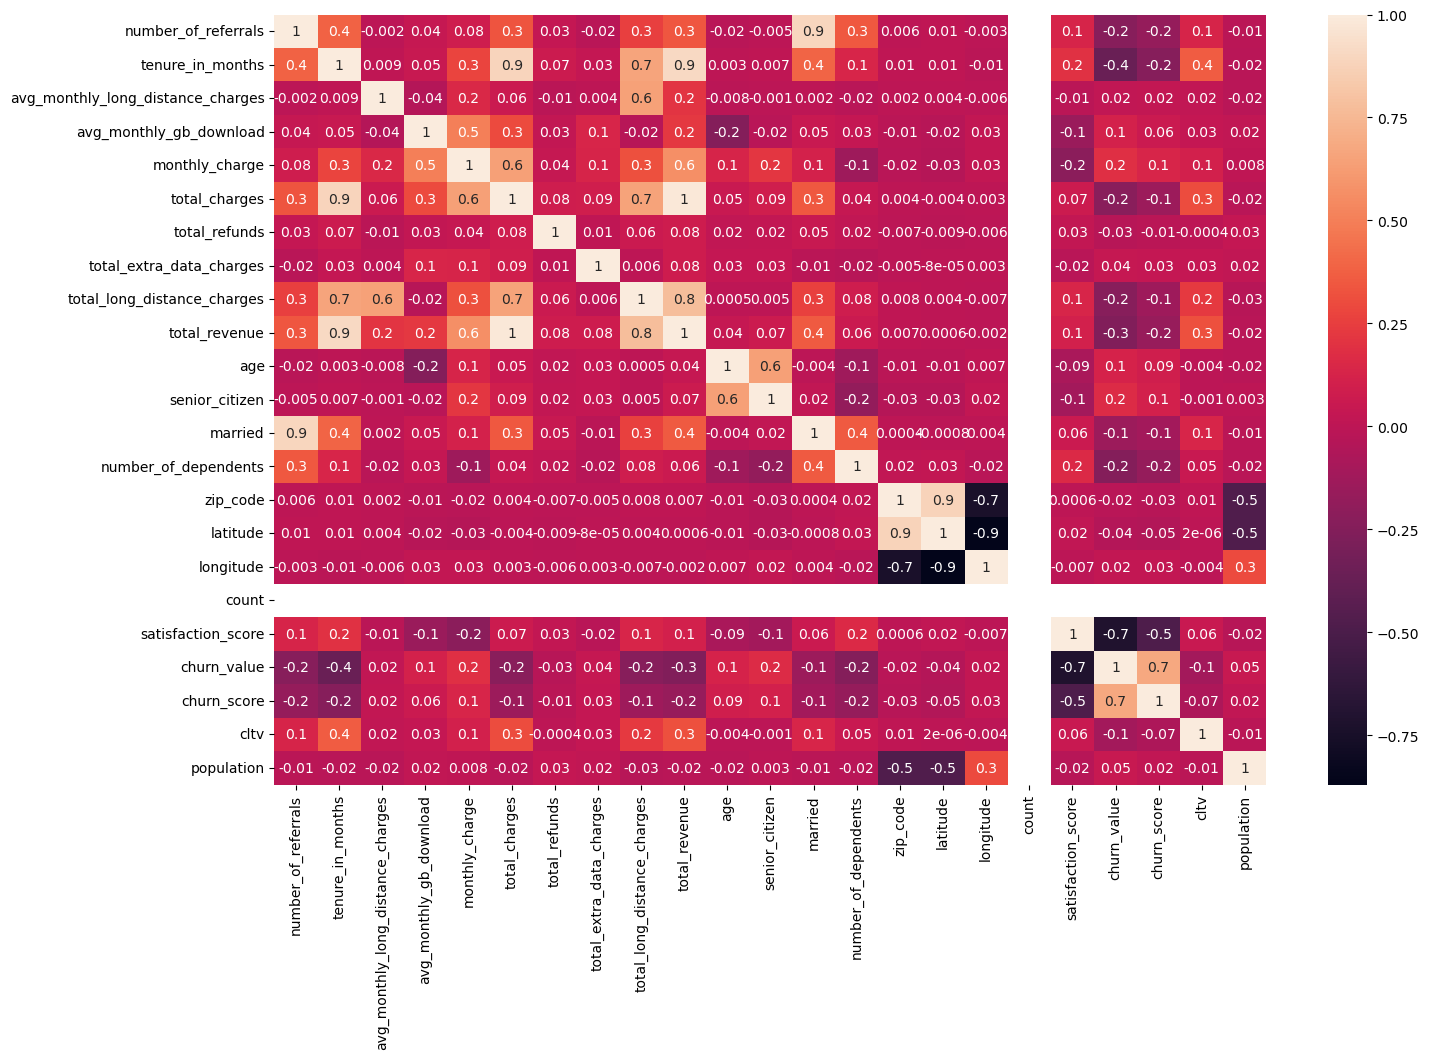

In [276]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [277]:
df_corr

,number_of_referrals,tenure_in_months,avg_monthly_long_distance_charges,avg_monthly_gb_download,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,...,number_of_dependents,zip_code,latitude,longitude,count,satisfaction_score,churn_value,churn_score,cltv,population
number_of_referrals,1.000000,0.384508,-0.002145,0.039954,0.083564,0.328870,0.033619,-0.016453,0.252610,0.339566,...,0.349738,0.005822,0.010692,-0.003249,NaN,0.127705,-0.229408,-0.172404,0.128780,-0.009582
tenure_in_months,0.384508,1.000000,0.009138,0.050390,0.272890,0.888774,0.072195,0.029292,0.661486,0.911490,...,0.134050,0.012667,0.011937,-0.013752,NaN,0.196663,-0.363195,-0.238686,0.358143,-0.021817
avg_monthly_long_distance_charges,-0.002145,0.009138,1.000000,-0.043505,0.152341,0.059322,-0.012863,0.004358,0.648757,0.207913,...,-0.018589,0.002225,0.003982,-0.006358,NaN,-0.010251,0.016219,0.022719,0.019280,-0.019170
avg_monthly_gb_download,0.039954,0.050390,-0.043505,1.000000,0.502108,0.296122,0.027258,0.136763,-0.022968,0.218976,...,0.034533,-0.014555,-0.024293,0.027055,NaN,-0.148515,0.111324,0.063847,0.030056,0.017069
monthly_charge,0.083564,0.272890,0.152341,0.502108,1.000000,0.636355,0.042400,0.129245,0.320177,0.569023,...,-0.132583,-0.015703,-0.030301,0.025745,NaN,-0.213112,0.189299,0.134855,0.108137,0.007985
total_charges,0.328870,0.888774,0.059322,0.296122,0.636355,1.000000,0.080598,0.087217,0.651072,0.978806,...,0.041908,0.003550,-0.003771,0.002679,NaN,0.070402,-0.225585,-0.143558,0.303238,-0.015149
total_refunds,0.033619,0.072195,-0.012863,0.027258,0.042400,0.080598,1.000000,0.012473,0.058062,0.075734,...,0.015646,-0.007035,-0.009220,-0.006454,NaN,0.028129,-0.028040,-0.011356,-0.000408,0.034747
total_extra_data_charges,-0.016453,0.029292,0.004358,0.136763,0.129245,0.087217,0.012473,1.000000,0.005679,0.077680,...,-0.024307,-0.004563,-0.000082,0.002837,NaN,-0.021862,0.037821,0.028949,0.029096,0.017729
total_long_distance_charges,0.252610,0.661486,0.648757,-0.022968,0.320177,0.651072,0.058062,0.005679,1.000000,0.776682,...,0.084013,0.007999,0.004409,-0.006802,NaN,0.132991,-0.232762,-0.138130,0.230630,-0.027481
total_revenue,0.339566,0.911490,0.207913,0.218976,0.569023,0.978806,0.075734,0.077680,0.776682,1.000000,...,0.062868,0.007005,0.000552,-0.001608,NaN,0.102245,-0.256706,-0.162045,0.315367,-0.021472


In [278]:
for col in df_numerical_variables.columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: number_of_referrals
shape: (12, 1)
┌─────────────────────┐
│ number_of_referrals │
│ ---                 │
│ i64                 │
╞═════════════════════╡
│ 0                   │
│ 3                   │
│ 9                   │
│ 6                   │
│ 4                   │
│ …                   │
│ 1                   │
│ 2                   │
│ 8                   │
│ 5                   │
│ 11                  │
└─────────────────────┘

Coluna: tenure_in_months
shape: (72, 1)
┌──────────────────┐
│ tenure_in_months │
│ ---              │
│ i64              │
╞══════════════════╡
│ 15               │
│ 18               │
│ 21               │
│ 24               │
│ 3                │
│ …                │
│ 68               │
│ 59               │
│ 65               │
│ 62               │
│ 71               │
└──────────────────┘

Coluna: avg_monthly_long_distance_charges
shape: (3_184, 1)
┌─────────────────────────────────┐
│ avg_monthly_long_distance_char… │
│ ---             

In [279]:
bivalue_columns = [
    'referred_a_friend'
    ,'phone_service'
    ,'multiple_lines'
    ,'internet_service'
    ,'online_security'
    ,'online_backup'
    ,'device_protection_plan'
    ,'premium_tech_support'
    ,'streaming_tv'
    ,'streaming_movies'
    ,'streaming_music'
    ,'unlimited_data'
    ,'paperless_billing'
    ,'gender'
    ,'churn_label'
    #,'senior_citizen'
    #,'married'
]

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\1510456290.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1) = plt.subplots(1,1, figsize = (14,6))


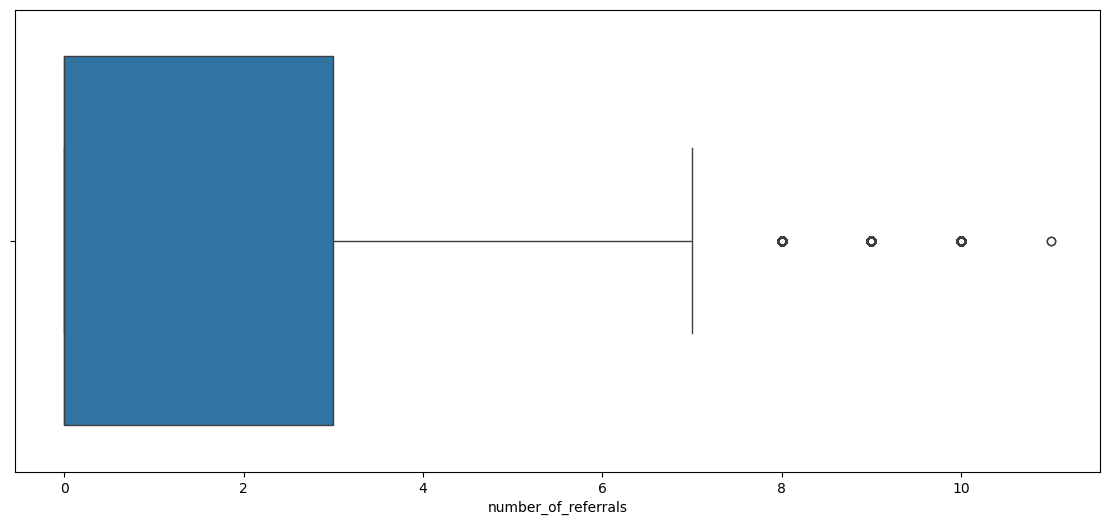

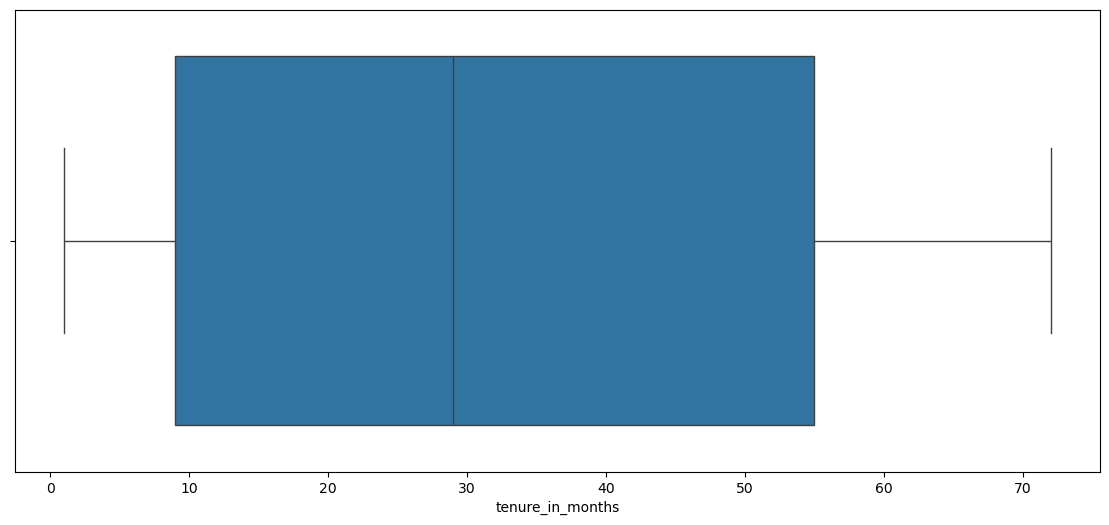

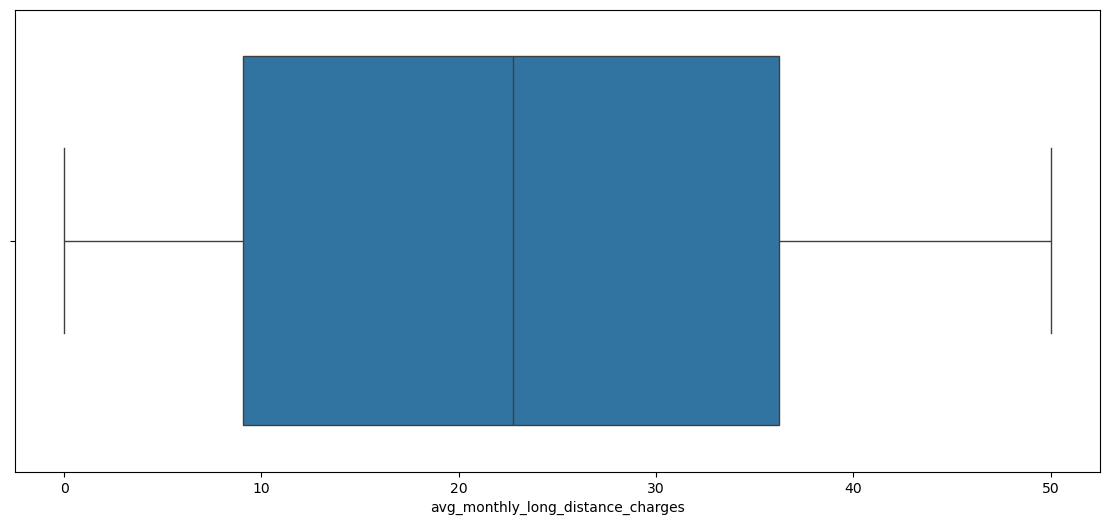

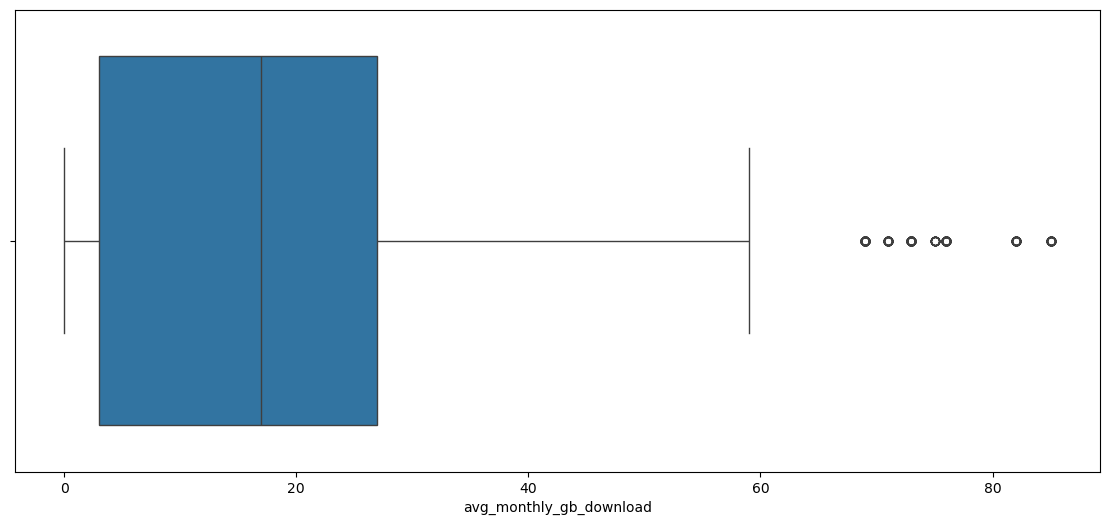

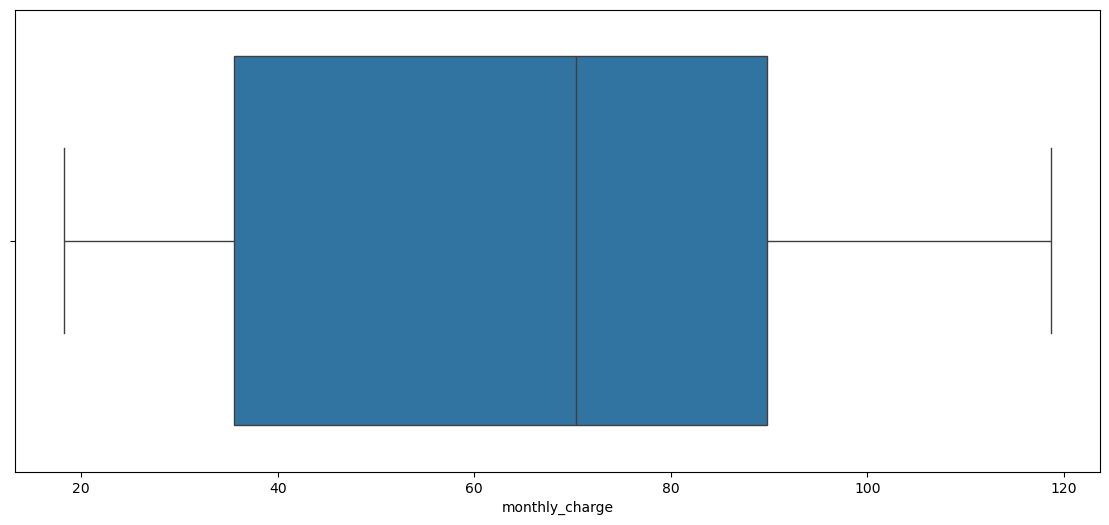

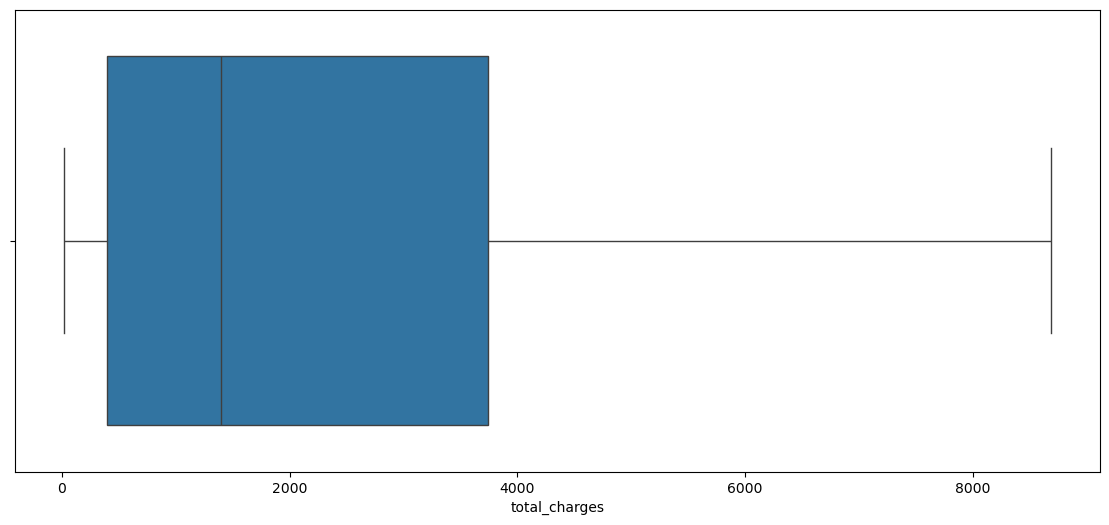

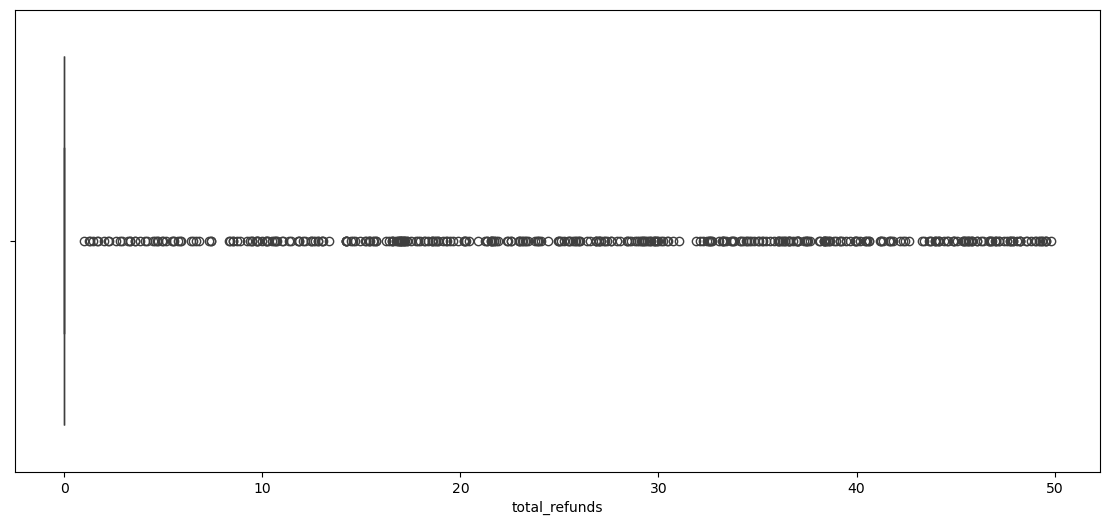

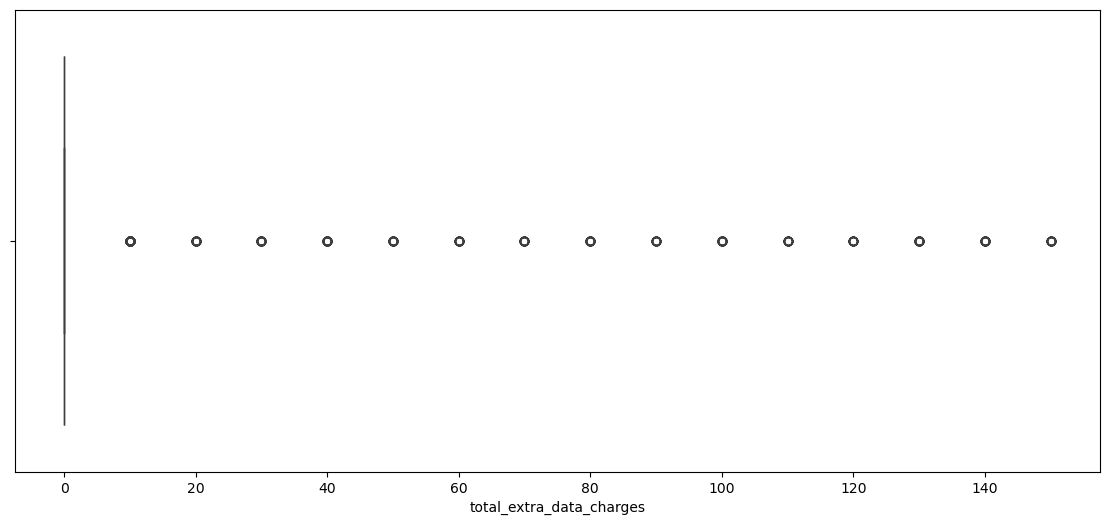

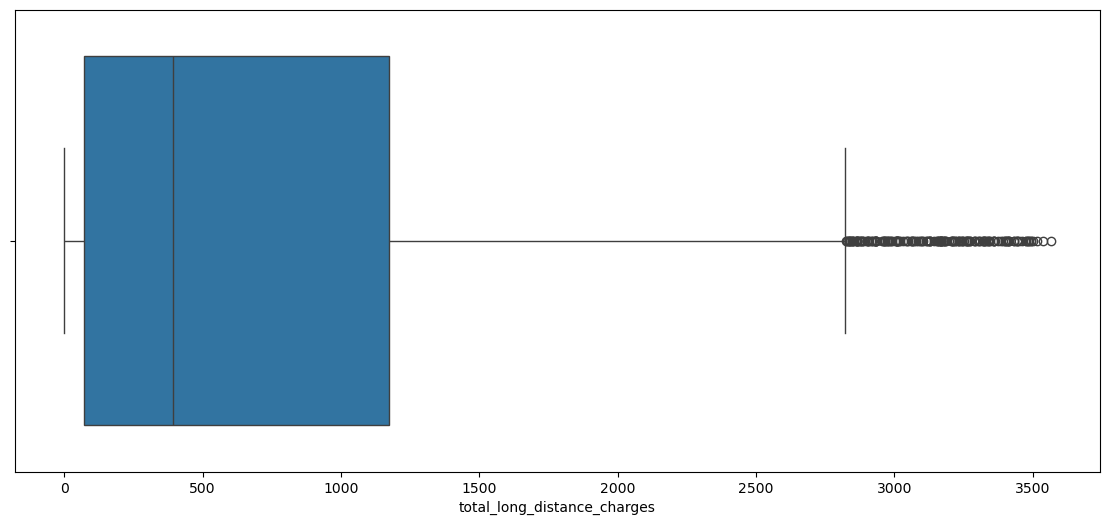

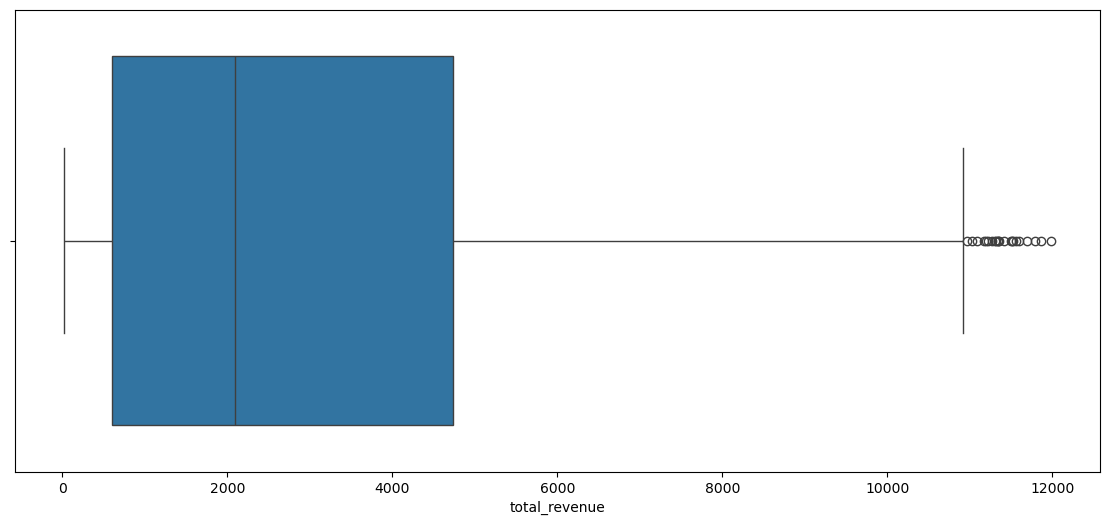

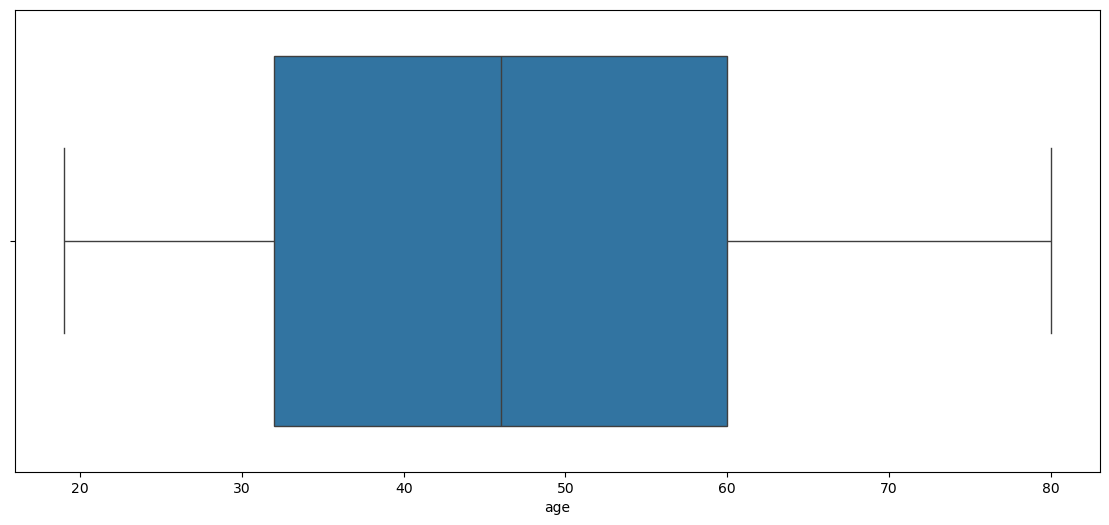

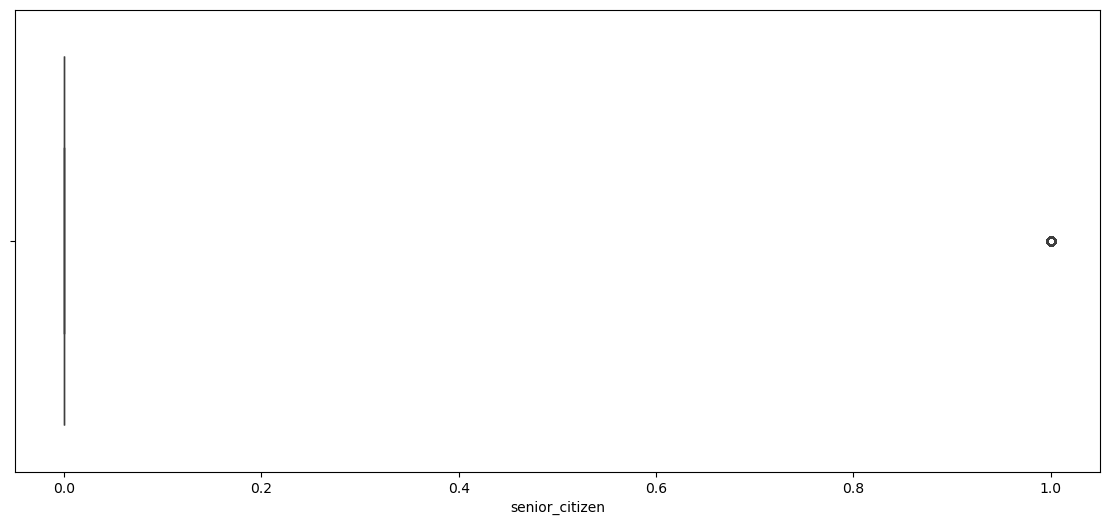

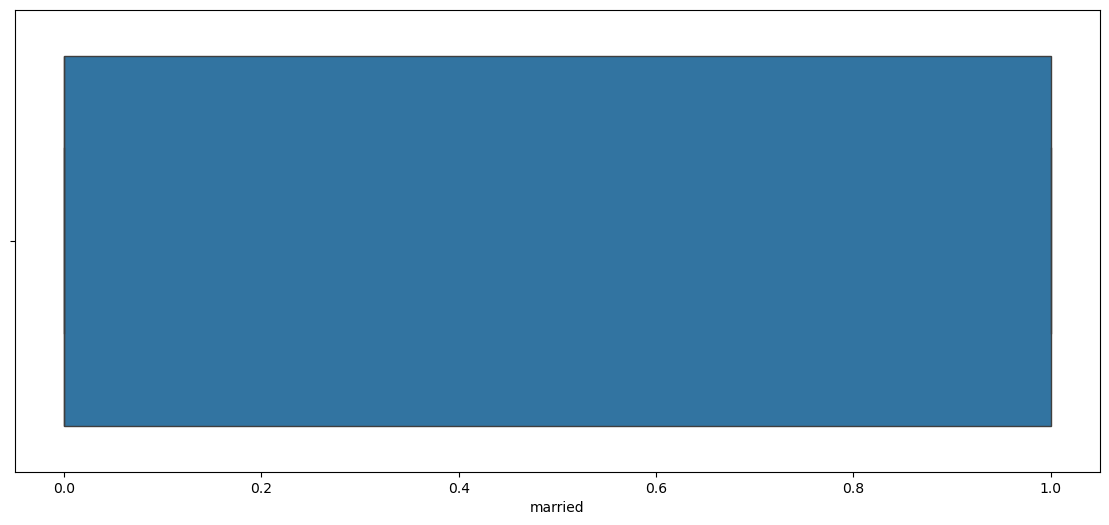

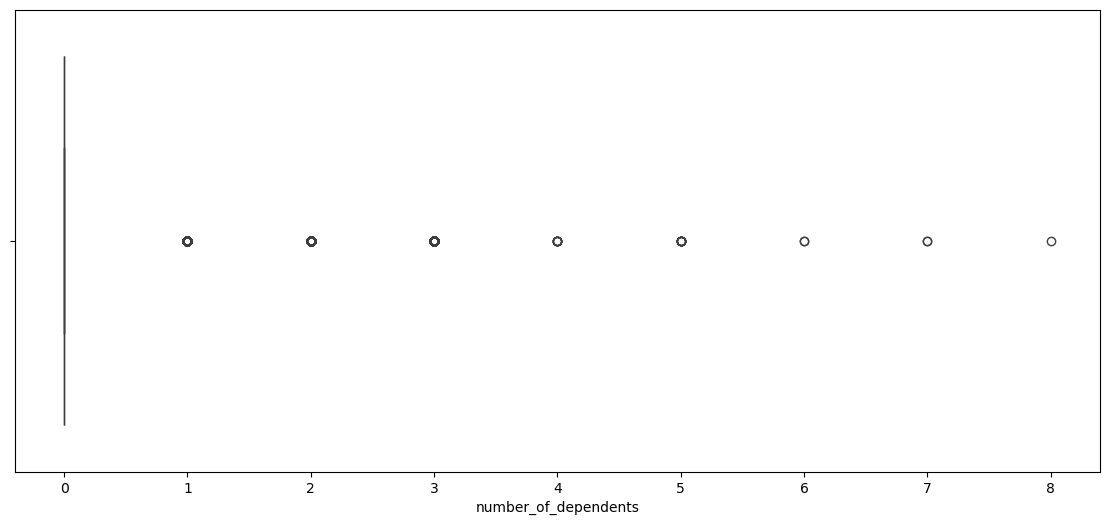

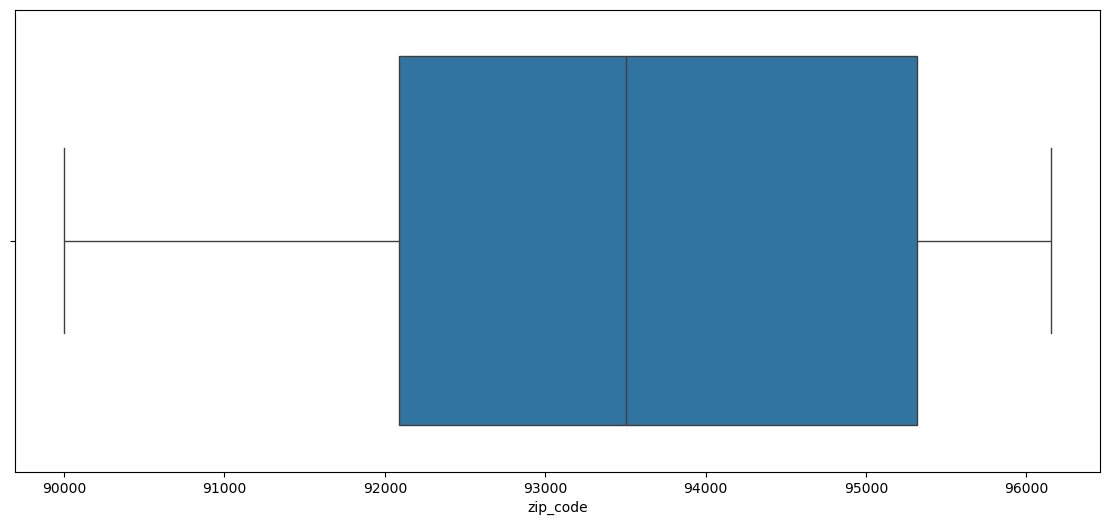

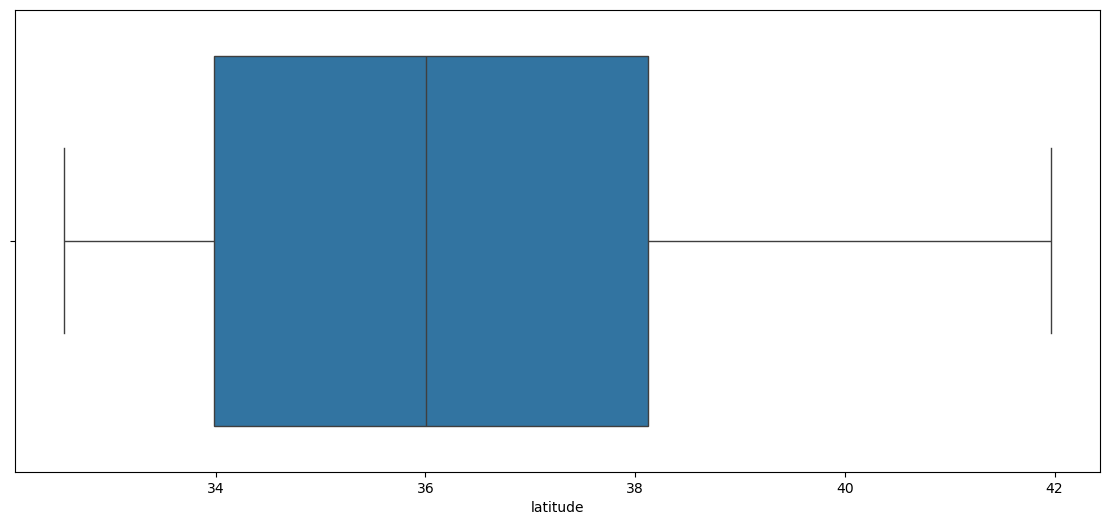

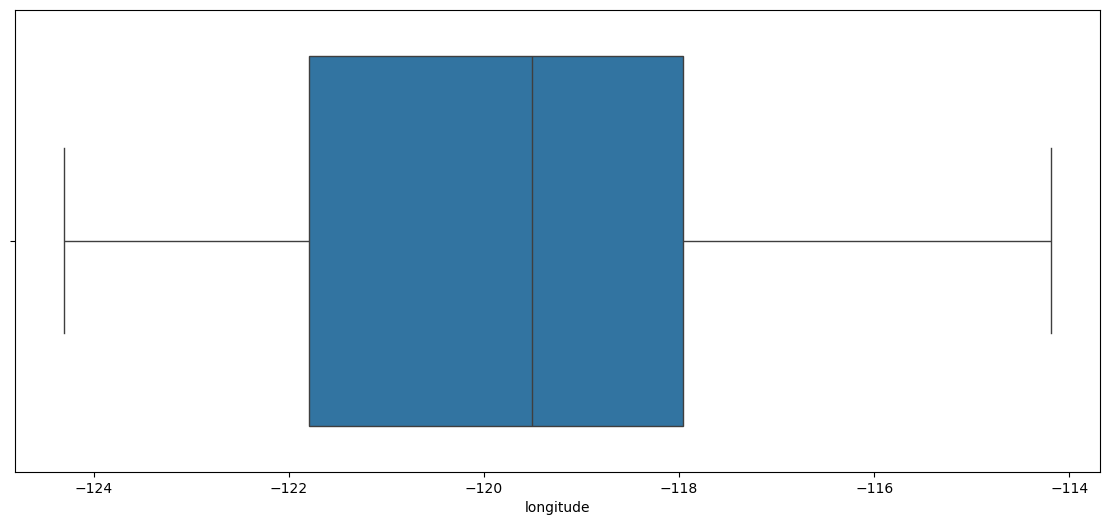

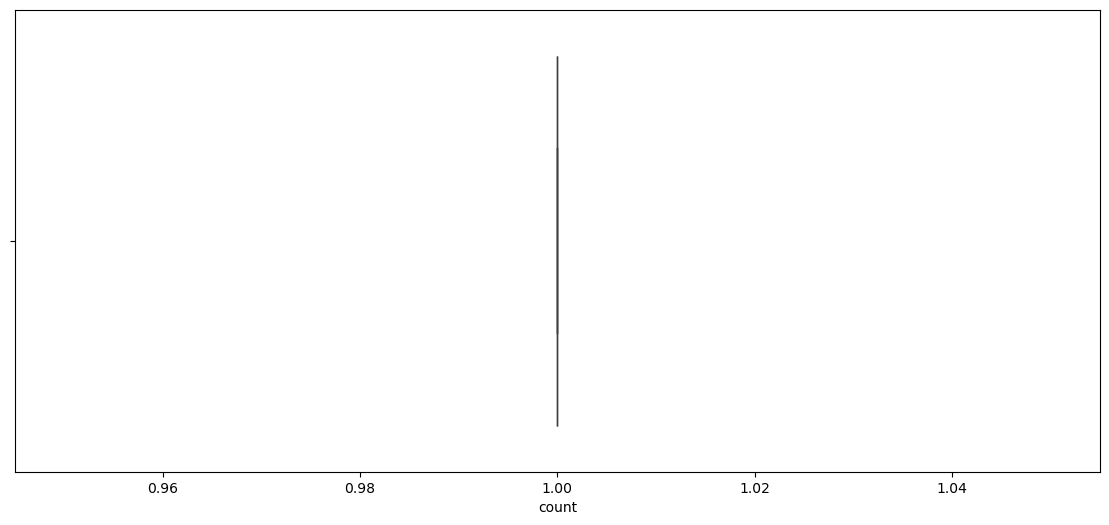

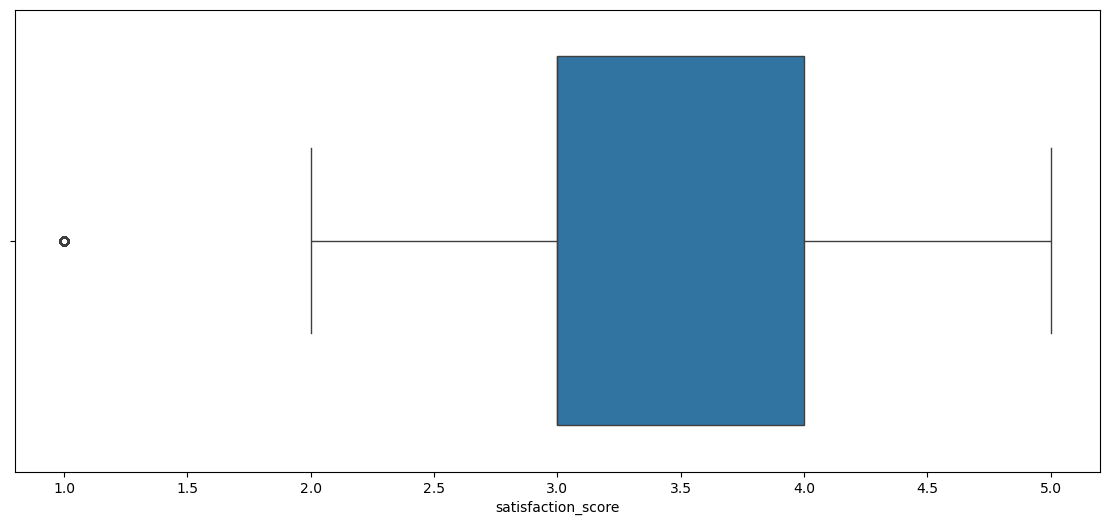

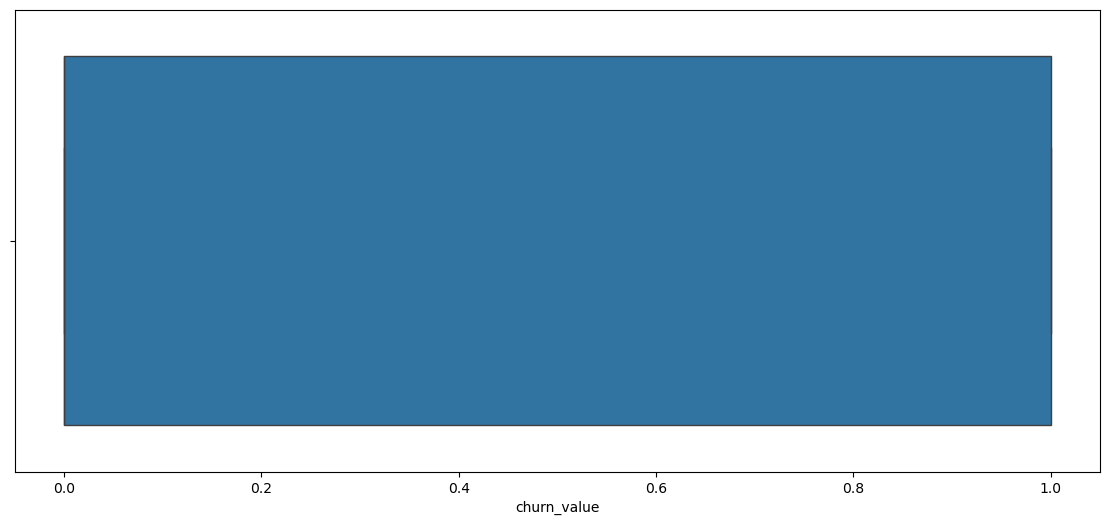

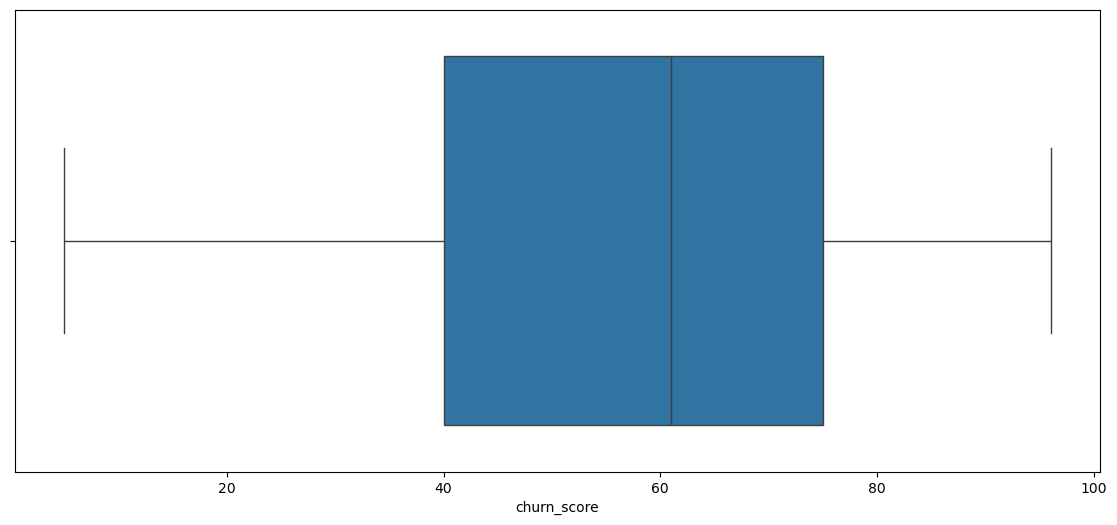

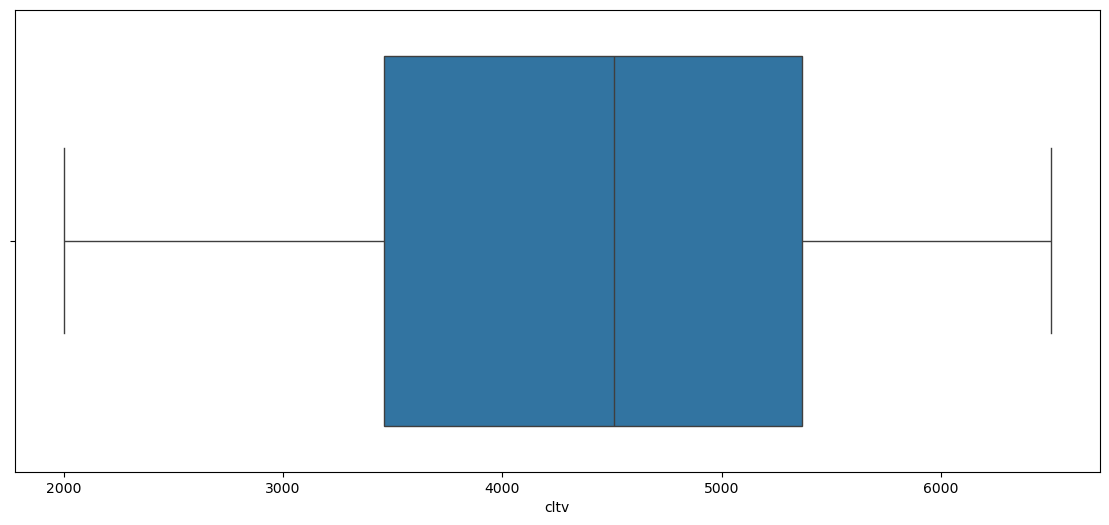

In [280]:
for col in df_numerical_variables.columns:
    if col in bivalue_columns:
        continue
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6))
    sns.boxplot(ax = ax1, data = df_numerical_variables, x = col)
plt.close()
#Using boxplots to better visualize the outliers

In [281]:
for col in ['number_of_dependents', 'total_extra_data_charges', 'total_refunds']: 
    print(df.select(col).unique())
    print()

shape: (9, 1)
┌──────────────────────┐
│ number_of_dependents │
│ ---                  │
│ i64                  │
╞══════════════════════╡
│ 0                    │
│ 6                    │
│ 3                    │
│ 1                    │
│ 7                    │
│ 4                    │
│ 5                    │
│ 2                    │
│ 8                    │
└──────────────────────┘

shape: (16, 1)
┌──────────────────────────┐
│ total_extra_data_charges │
│ ---                      │
│ i64                      │
╞══════════════════════════╡
│ 0                        │
│ 140                      │
│ 30                       │
│ 60                       │
│ 90                       │
│ …                        │
│ 130                      │
│ 20                       │
│ 50                       │
│ 80                       │
│ 110                      │
└──────────────────────────┘

shape: (390, 1)
┌───────────────┐
│ total_refunds │
│ ---           │
│ f64           │
╞════════════

In [282]:

df.select(
    pl.col('number_of_dependents').value_counts(sort=True)
).unnest('number_of_dependents')


number_of_dependents,count
i64,u32
0,4309
2,442
1,439
3,422
5,10
4,7
7,2
6,2
8,1


In [283]:
df.select(
    pl.col('senior_citizen').value_counts(sort=True)
).unnest('senior_citizen')

senior_citizen,count
i64,u32
0,4731
1,903


In [284]:
df.select(
    pl.col('churn_value').value_counts(sort=True)
).unnest('churn_value')

churn_value,count
i64,u32
0,4158
1,1476


<a class="anchor" id="1st-bullet">

## 1.1Pre-Processing

</a>

In [285]:
df.columns

['customer_id',
 'referred_a_friend',
 'number_of_referrals',
 'tenure_in_months',
 'offer',
 'phone_service',
 'avg_monthly_long_distance_charges',
 'multiple_lines',
 'internet_service',
 'internet_type',
 'avg_monthly_gb_download',
 'online_security',
 'online_backup',
 'device_protection_plan',
 'premium_tech_support',
 'streaming_tv',
 'streaming_movies',
 'streaming_music',
 'unlimited_data',
 'contract',
 'paperless_billing',
 'payment_method',
 'monthly_charge',
 'total_charges',
 'total_refunds',
 'total_extra_data_charges',
 'total_long_distance_charges',
 'total_revenue',
 'gender',
 'age',
 'under_30',
 'senior_citizen',
 'married',
 'number_of_dependents',
 'city',
 'zip_code',
 'lat_long',
 'latitude',
 'longitude',
 'count',
 'quarter',
 'satisfaction_score',
 'customer_status',
 'churn_label',
 'churn_value',
 'churn_score',
 'cltv',
 'churn_category',
 'churn_reason',
 'population']

In [286]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    print(f"Coluna: {col}")
    print(df.select(col).unique())
    print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 6711-FLDFB  │
│ 4710-FDUIZ  │
│ 0621-TWIEM  │
│ 8480-PPONV  │
│ 6817-WTYHE  │
│ …           │
│ 6022-KOUQO  │
│ 3450-WXOAT  │
│ 9289-LBQVU  │
│ 7511-YMXVQ  │
│ 8945-GRKHX  │
└─────────────┘

Coluna: referred_a_friend
shape: (2, 1)
┌───────────────────┐
│ referred_a_friend │
│ ---               │
│ str               │
╞═══════════════════╡
│ Yes               │
│ No                │
└───────────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer A │
│ None    │
│ Offer B │
│ Offer C │
│ Offer D │
│ Offer E │
└─────────┘

Coluna: phone_service
shape: (2, 1)
┌───────────────┐
│ phone_service │
│ ---           │
│ str           │
╞═══════════════╡
│ Yes           │
│ No            │
└───────────────┘

Coluna: multiple_lines
shape: (2, 1)
┌────────────────┐
│ multiple_lines │
│ ---            │
│ str            │
╞════

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\2074748385.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


<a class="anchor" id="1st-bullet">

### 1.1.2 Solve Outliers

</a>

In [287]:
q1, q3 = df.select([
    pl.col("number_of_referrals").quantile(0.25).alias("q1"),
    pl.col("number_of_referrals").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("number_of_referrals")
      .clip(upper_bound=upper_bound)
)

In [288]:
q1, q3 = df.select([
    pl.col("avg_monthly_gb_download").quantile(0.25).alias("q1"),
    pl.col("avg_monthly_gb_download").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("avg_monthly_gb_download")
      .clip(upper_bound=upper_bound)
)

In [289]:
q1, q3 = df.select([
    pl.col("total_long_distance_charges").quantile(0.25).alias("q1"),
    pl.col("total_long_distance_charges").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_long_distance_charges")
      .clip(upper_bound=upper_bound)
)

In [290]:
q1, q3 = df.select([
    pl.col("total_revenue").quantile(0.25).alias("q1"),
    pl.col("total_revenue").quantile(0.75).alias("q3")
]).row(0)

upper_bound = q3 + (q3 - q1) * 1.5

df = df.with_columns(
    pl.col("total_revenue")
      .clip(upper_bound=upper_bound)
)

In [291]:
q1, q3 = df.select([
    pl.col("satisfaction_score").quantile(0.25).alias("q1"),
    pl.col("satisfaction_score").quantile(0.75).alias("q3")
]).row(0)

lower_bound = q1 - (q3 - q1) * 1.5

df = df.with_columns(
    pl.when(pl.col("satisfaction_score") < lower_bound)
      .then(pl.lit(lower_bound))
      .otherwise(pl.col("satisfaction_score"))
      .alias("satisfaction_score")
)

<a class="anchor" id="1st-bullet">

### 1.1.2 Power Transformation
</a>

In [292]:
cols = [
    'avg_monthly_long_distance_charges',
    'avg_monthly_gb_download',
    'monthly_charge',
    'total_charges',
    'total_refunds',
    'total_extra_data_charges',
    'total_revenue',
    'population'
]
for col in cols:
    df = df.with_columns(
        pl.col(col).cbrt().alias(col)
    )


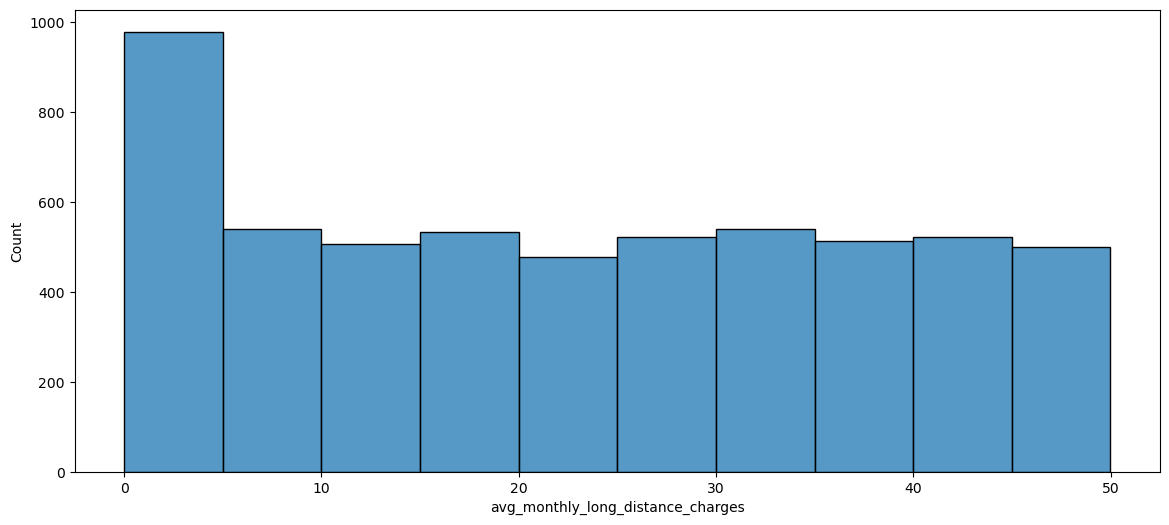

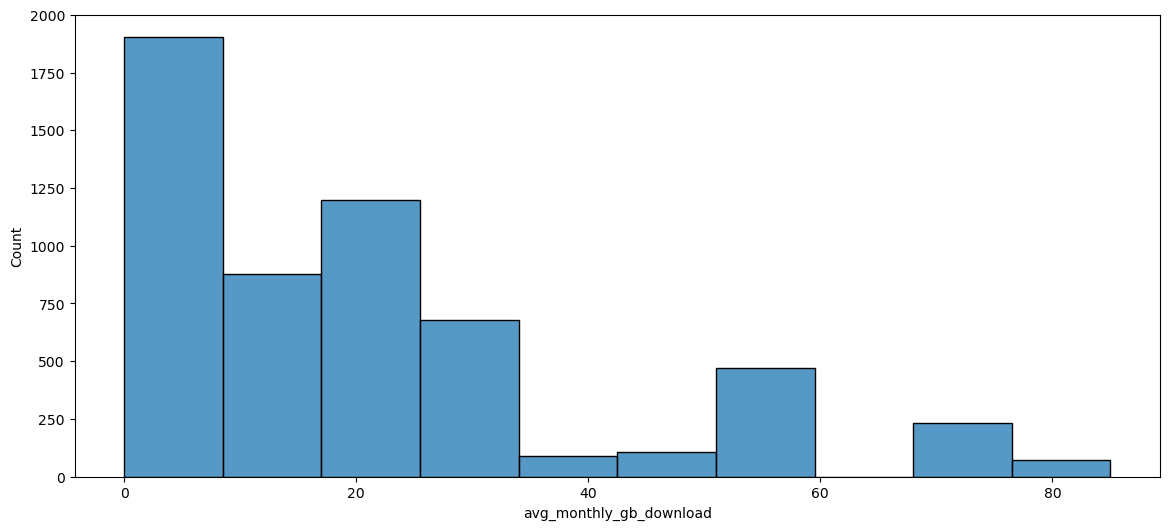

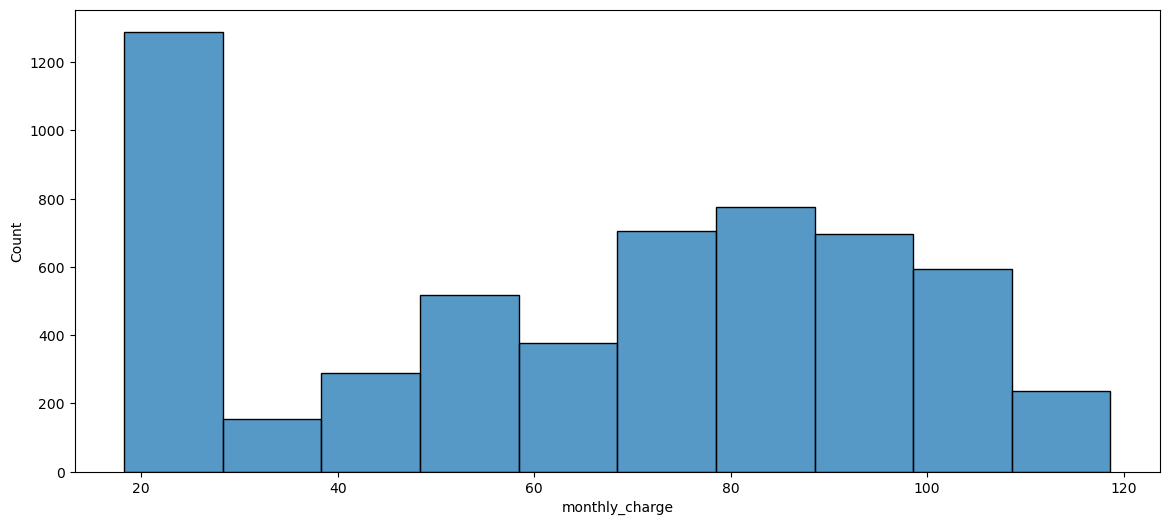

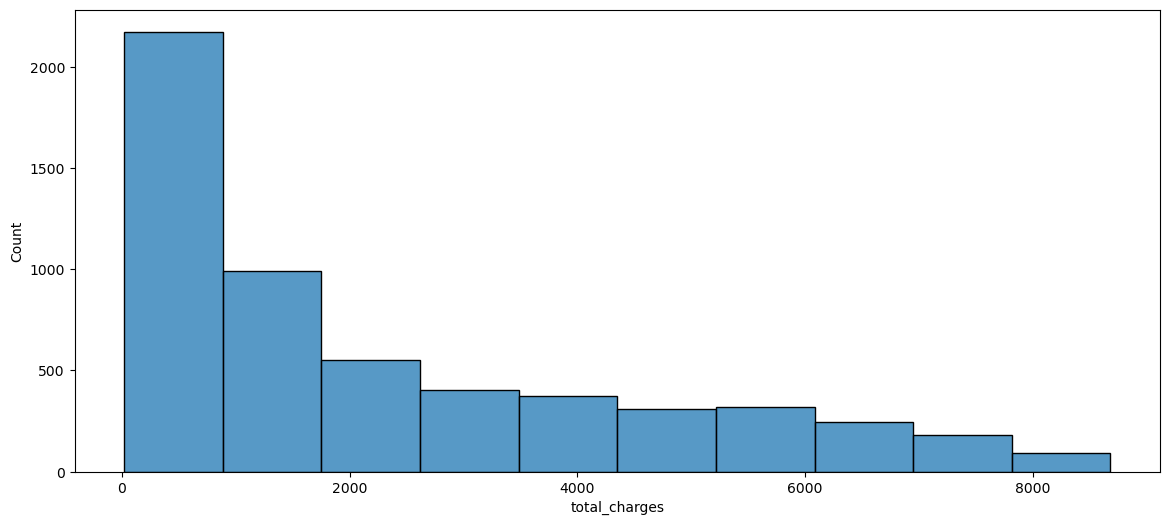

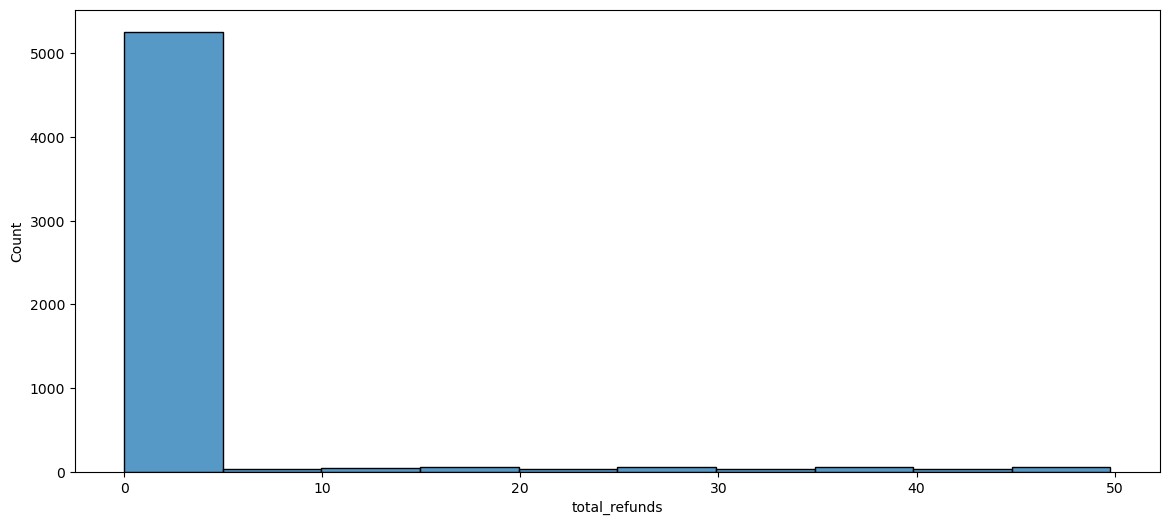

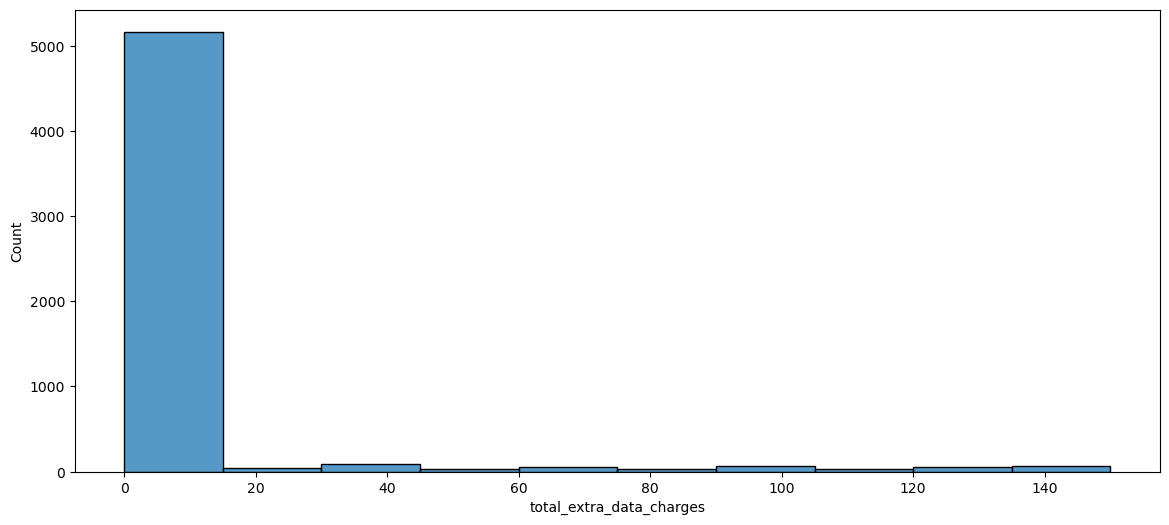

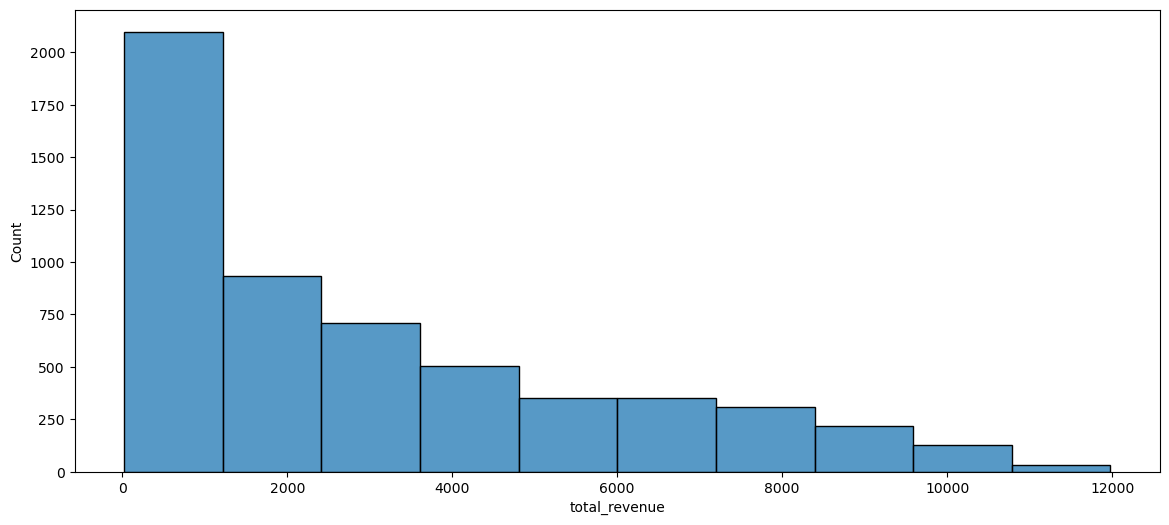

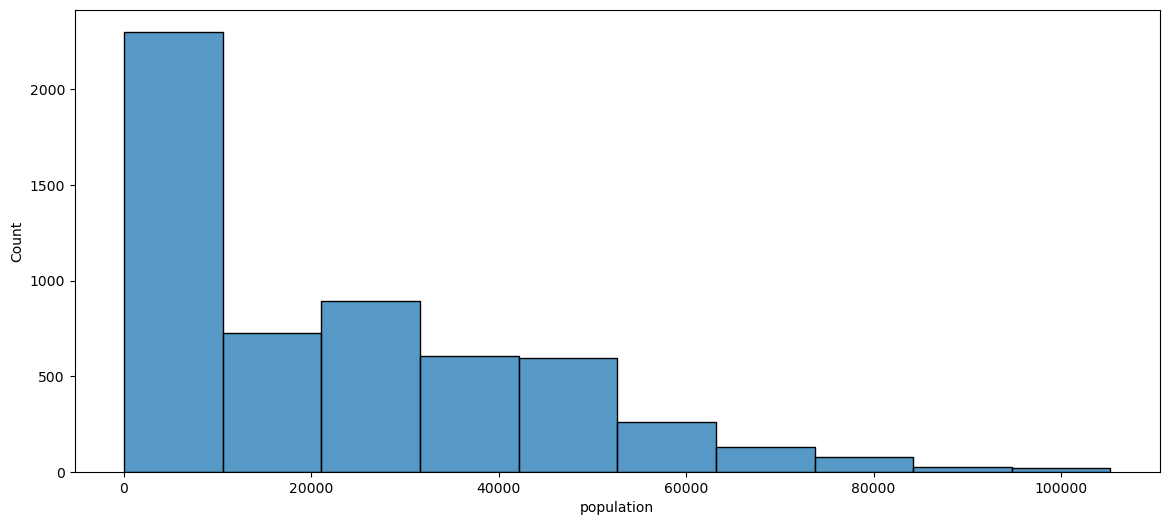

In [293]:
for col in cols:
    fig, (ax1) = plt.subplots(1,1, figsize = (14,6)) 
    sns.histplot(ax = ax1, data = df_numerical_variables.to_pandas(), x = col, bins = 10) #df_numerical_variables.to_pandas



<a class="anchor" id="1st-bullet">

### 1.1.3 Encoding variables

</a>

In [294]:
valid_vals = ["yes", "no", "male", "female"]

for col in bivalue_columns:
    df = df.with_columns(
        pl.col(col).str.to_lowercase().str.strip_chars()
    )

    mode_val = (
        df
        .filter(pl.col(col).is_in(valid_vals))
        .select(pl.col(col).mode())
        .item()
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(valid_vals))
            .then(pl.col(col))
            .otherwise(pl.lit(mode_val))
            .alias(col)
    )

    df = df.with_columns(
        pl.when(pl.col(col).is_in(["yes", "male"]))
            .then(1)
          .when(pl.col(col).is_in(["no", "female"]))
            .then(0)
          .otherwise(None)
          .cast(pl.Int32)
          .alias(col)
    )

In [295]:
df

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,f64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,f64
"""9866-OCCKE""",1,1,72,"""Offer A""",1,3.272312,1,1,"""Fiber Optic""",2.802039,1,0,1,1,1,1,0,1,"""Two Year""",1,"""Mailed Check""",4.787787,20.062596,0.0,0.0,2522.88,21.96567,0,73,null,1,1,0,"""San Diego""",92114,"""32.707892, -117.05512""",32.707892,-117.05512,1,"""Q3""",4.0,"""Stayed""",0,0,34,6010,"""NO_LABEL""","""NO_LABEL""",40.58272
"""6922-NCEDI""",0,0,56,"""Offer B""",1,3.650072,0,0,"""None""",0.0,0,0,0,0,0,0,0,0,"""One Year""",1,"""Mailed Check""",2.767655,10.73947,0.0,0.0,2723.28,15.82349,1,38,null,0,0,0,"""Costa Mesa""",92627,"""33.645672, -117.922613""",33.645672,-117.922613,1,"""Q3""",4.0,"""Stayed""",0,0,23,6473,"""NO_LABEL""","""NO_LABEL""",39.593593
"""1658-TJVOA""",0,0,6,"""None""",1,2.331268,0,1,"""Fiber Optic""",2.714418,1,0,0,0,0,0,0,1,"""Two Year""",1,"""Bank Withdrawal""",4.200227,7.6682,0.0,0.0,76.02,8.076965,0,65,null,1,0,0,"""Cazadero""",95421,"""38.578807, -123.19338""",38.578807,-123.19338,1,"""Q3""",3.0,"""Stayed""",0,0,79,4716,"""NO_LABEL""","""NO_LABEL""",11.634834
"""6475-VHUIZ""",1,6,23,"""Offer D""",1,3.389181,0,1,"""Cable""",1.587401,0,0,1,1,0,0,0,1,"""Month-to-Month""",0,"""Bank Withdrawal""",3.785587,10.689821,0.0,0.0,895.39,12.840133,0,47,null,0,1,0,"""Myers Flat""",95554,"""40.267158, -123.805913""",40.267158,-123.805913,1,"""Q3""",5.0,"""Stayed""",0,0,49,5140,"""NO_LABEL""","""NO_LABEL""",8.635655
"""5199-FPUSP""",0,0,33,"""None""",0,0.0,0,1,"""Cable""",2.289428,1,0,0,1,0,0,0,1,"""One Year""",0,"""Credit Card""",3.241199,10.366255,0.0,0.0,0.0,10.366255,1,64,null,0,0,2,"""Esparto""",95627,"""38.834469, -122.127193""",38.834469,-122.127193,1,"""Q3""",3.0,"""Stayed""",0,0,73,3044,"""NO_LABEL""","""NO_LABEL""",14.020378
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""2792-LSHWX""",0,0,1,"""None""",1,3.505027,0,1,"""Fiber Optic""",2.080084,1,1,0,1,0,0,0,1,"""Month-to-Month""",1,"""Credit Card""",4.369067,4.369067,0.0,0.0,43.06,5.019391,0,49,null,0,0,0,"""Fremont""",94555,"""37.555473, -122.080312""",37.555473,-122.080312,1,"""Q3""",3.0,"""Joined""",0,0,26,5960,"""NO_LABEL""","""NO_LABEL""",32.358915
"""0772-GYEQQ""",0,0,3,"""Offer E""",1,3.669236,0,1,"""Fiber Optic""",2.154435,0,0,1,1,1,0,0,1,"""Month-to-Month""",1,"""Credit Card""",4.453849,6.399235,0.0,0.0,148.2,7.430468,1,33,null,0,0,0,"""Lodi""",95240,"""38.123544, -121.159078""",38.123544,-121.159078,1,"""Q3""",2.0,"""Churned""",1,1,93,5202,"""Competitor""","""Competitor offered more data""",35.766753
"""6080-LNESI""",0,0,51,"""Offer B""",1,2.624134,1,0,"""None""",0.0,0,0,0,0,0,0,0,0,"""Two Year""",0,"""Credit Card""",2.914238,10.727753,0.0,0.0,921.57,12.918963,1,63,null,0,0,0,"""Hercules""",94547,"""37.991259, -122.214945""",37.991259,-122.214945,1,"""Q3""",3.0,"""Stayed""",0,0,46,5080,"""NO_LABEL""","""NO_LABEL""",28.222295


<a class="anchor" id="1st-bullet">

### 1.1.4 Double check for null values and duplicates after these all transformations

</a>

In [296]:
df.null_count()

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [297]:
df.filter(df.is_duplicated())

customer_id,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,gender,age,under_30,senior_citizen,married,number_of_dependents,city,zip_code,lat_long,latitude,longitude,count,quarter,satisfaction_score,customer_status,churn_label,churn_value,churn_score,cltv,churn_category,churn_reason,population
str,i32,i64,i64,str,i32,f64,i32,i32,str,f64,i32,i32,i32,i32,i32,i32,i32,i32,str,i32,str,f64,f64,f64,f64,f64,f64,i32,i64,f64,i64,i64,i64,str,i64,str,f64,f64,i64,str,f64,str,i32,i64,i64,i64,str,str,f64


In [298]:
for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:
    if col not in bivalue_columns:
        print(f"Coluna: {col}")
        print(df.select(col).unique())
        print()

Coluna: customer_id
shape: (5_634, 1)
┌─────────────┐
│ customer_id │
│ ---         │
│ str         │
╞═════════════╡
│ 7654-YWJUF  │
│ 3440-JPSCL  │
│ 5647-FXOTP  │
│ 4710-NKCAW  │
│ 4512-ZUIYL  │
│ …           │
│ 6686-YPGHK  │
│ 9667-EQRXU  │
│ 0568-ONFPC  │
│ 6369-MCAKO  │
│ 2805-EDJPQ  │
└─────────────┘

Coluna: offer
shape: (6, 1)
┌─────────┐
│ offer   │
│ ---     │
│ str     │
╞═════════╡
│ Offer B │
│ Offer D │
│ Offer C │
│ Offer E │
│ None    │
│ Offer A │
└─────────┘

Coluna: internet_type
shape: (4, 1)
┌───────────────┐
│ internet_type │
│ ---           │
│ str           │
╞═══════════════╡
│ Cable         │
│ Fiber Optic   │
│ DSL           │
│ None          │
└───────────────┘

Coluna: contract
shape: (3, 1)
┌────────────────┐
│ contract       │
│ ---            │
│ str            │
╞════════════════╡
│ Two Year       │
│ Month-to-Month │
│ One Year       │
└────────────────┘

Coluna: payment_method
shape: (3, 1)
┌─────────────────┐
│ payment_method  │
│ ---             │

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\182089192.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  for col in df.select(pl.exclude(pl.NUMERIC_DTYPES)).columns:


In [299]:
valid_vals = ["Offer A", "Offer B", "Offer C","Offer D", "Offer E"]
col = "offer"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Offer A")
        .then(1)
        .when(pl.col(col) == "Offer B")
        .then(2)
        .when(pl.col(col) == "Offer C")
        .then(3)
        .when(pl.col(col) == "Offer D")
        .then(4)
        .when(pl.col(col) == "Offer E")
        .then(5)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [300]:
valid_vals = ["DSL", "Cable", "Fiber Optic"]
col = "internet_type"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "DSL")
        .then(1)
        .when(pl.col(col) == "Cable")
        .then(2)
        .when(pl.col(col) == "Fiber Optic")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [301]:
valid_vals = ["Month-to-Month", "One Year", "Two Year"]
col = "contract"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Month-to-Month")
        .then(1)
        .when(pl.col(col) == "One Year")
        .then(2)
        .when(pl.col(col) == "Two Year")
        .then(3)
        .otherwise(None)
        .cast(pl.Int32)
        .alias(col)
)

In [302]:
valid_vals = ["Churned", "Joined", "Stayed"]
col = "customer_status"
mode_val = (
    df
    .filter(pl.col(col).is_in(valid_vals))
    .select(pl.col(col).mode())
    .item()
)

df = df.with_columns(
    pl.when(pl.col(col).is_in(valid_vals))
        .then(pl.col(col))
        .otherwise(pl.lit(mode_val))
        .alias(col)
)

df = df.with_columns(
    pl.when(pl.col(col) == "Churned")
        .then(0)
        .otherwise(1)
        .cast(pl.Int32)
        .alias(col)
)

In [303]:
col = "churn_category"

df = df.with_columns(
    pl.when(pl.col(col) == "NO_LABEL")
        .then(pl.lit("Other"))
        .otherwise(pl.col(col))
        .alias(col)
)

In [304]:
col = "total_extra_data_charges"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [305]:
col = "total_refunds"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [306]:
col = "number_of_dependents"

df = df.with_columns(
    pl.when(pl.col(col) > 0)
        .then(pl.lit(1))
        .otherwise(pl.col(col))
        .alias(col)
)

In [307]:
df = df.to_dummies(columns=["payment_method"])

In [308]:
df = df.to_dummies(columns=["churn_category"])

In [309]:
df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))

C:\Users\Danie\AppData\Local\Temp\ipykernel_27556\4039034894.py:1: DeprecationWarning: `NUMERIC_DTYPES` was deprecated in version 1.0.0. Define your own data type groups or use the `polars.selectors` module for selecting columns of a certain data type.
  df_numerical_variables = df.select(pl.col(pl.NUMERIC_DTYPES))


<Axes: >

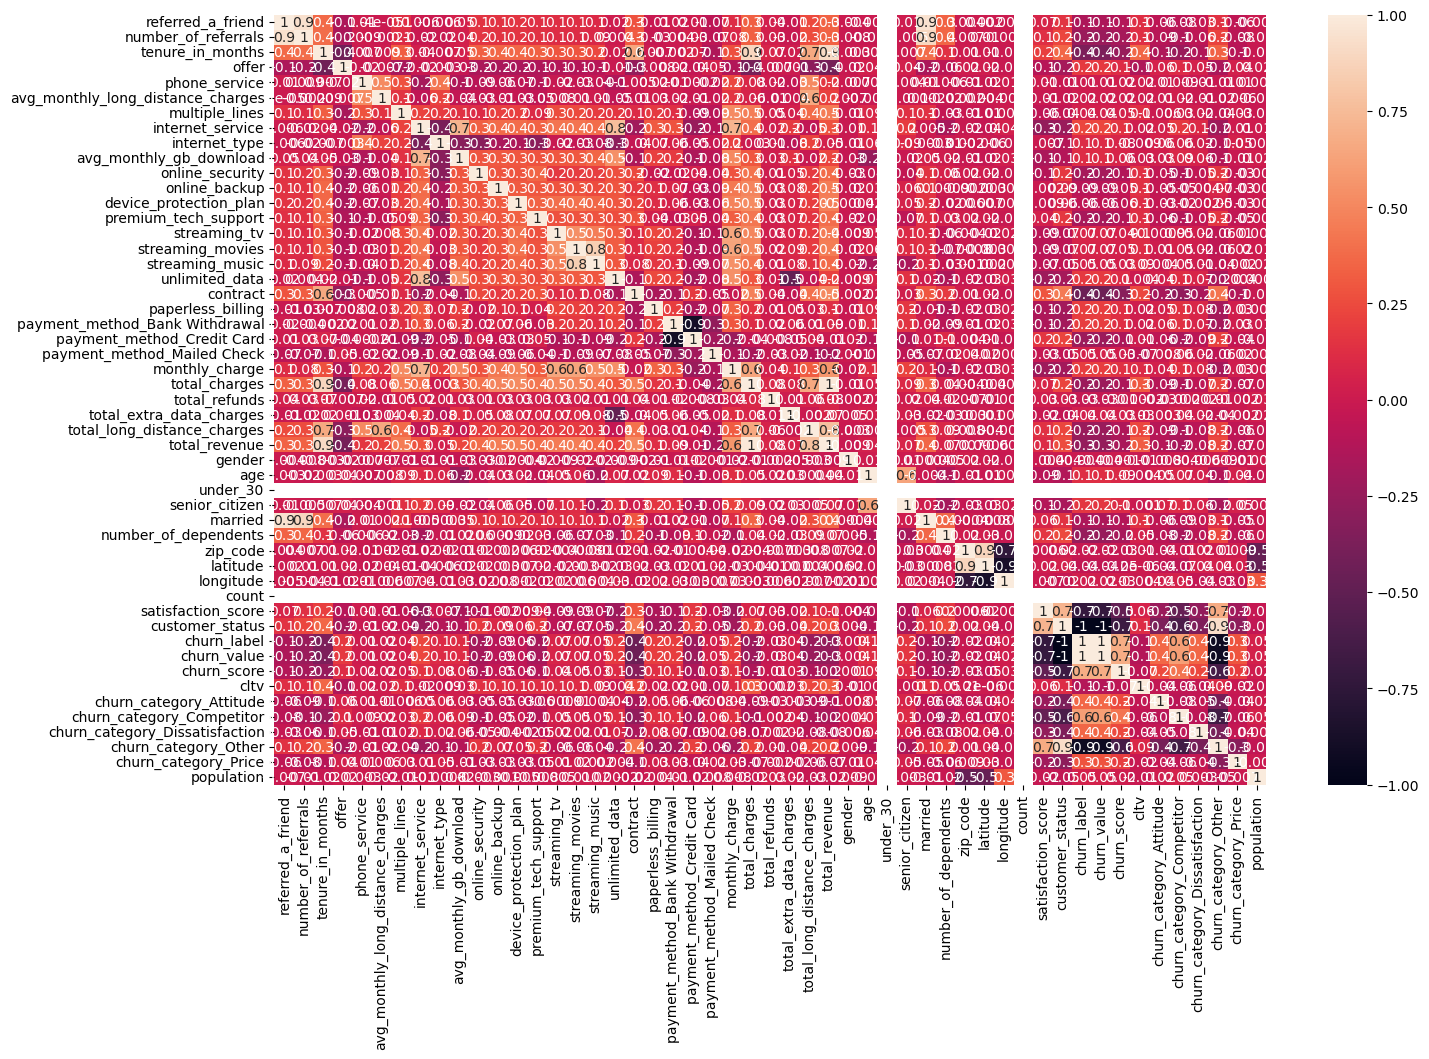

In [310]:
# calculate correlation matrix (convert to pandas for spearman correlation)
from scipy.stats import spearmanr
df_corr = df_numerical_variables.to_pandas().corr(method='spearman')

# plot the correlation matrix
plt.figure(figsize=(16,10))
sns.heatmap(df_corr, annot=True, fmt = '.1g')

In [311]:
df_corr

,referred_a_friend,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,...,churn_label,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
referred_a_friend,1.000000,0.944724,0.370050,-0.147085,0.010647,-0.000043,0.127516,0.005849,-0.006275,0.049462,...,-0.143518,-0.143518,-0.110584,0.121952,-0.064508,-0.084197,-0.028805,0.133773,-0.062038,-0.007061
number_of_referrals,0.944724,1.000000,0.384775,-0.160055,0.009449,-0.002467,0.113827,-0.015282,-0.018009,0.040027,...,-0.229241,-0.229241,-0.173217,0.128854,-0.094636,-0.137938,-0.063210,0.212998,-0.080214,-0.010834
tenure_in_months,0.370050,0.384775,1.000000,-0.422462,0.006599,0.009138,0.326240,0.038442,-0.006863,0.050496,...,-0.363195,-0.363195,-0.238686,0.358143,-0.138369,-0.227928,-0.122773,0.337549,-0.096109,-0.021817
offer,-0.147085,-0.160055,-0.422462,1.000000,-0.016897,-0.006741,-0.167191,-0.016787,-0.003369,-0.032841,...,0.174366,0.174366,0.117137,-0.139036,0.062170,0.104015,0.052362,-0.150993,0.041847,0.021176
phone_service,0.010647,0.009449,0.006599,-0.016897,1.000000,0.511797,0.279284,-0.172411,0.428740,-0.130004,...,0.014374,0.014374,0.024502,0.017401,0.013362,0.008606,-0.009549,-0.013633,0.013098,0.002585
avg_monthly_long_distance_charges,-0.000043,-0.002467,0.009138,-0.006741,0.511797,1.000000,0.147783,-0.060402,0.212140,-0.043534,...,0.016219,0.016219,0.022719,0.019280,0.013478,0.023577,-0.013767,-0.020082,0.005834,-0.019170
multiple_lines,0.127516,0.113827,0.326240,-0.167191,0.279284,0.147783,1.000000,0.214491,0.183901,0.139244,...,0.044359,0.044359,0.046025,0.123686,-0.006198,0.033352,0.023237,-0.043281,0.025058,-0.010831
internet_service,0.005849,-0.015282,0.038442,-0.016787,-0.172411,-0.060402,0.214491,1.000000,-0.382618,0.718566,...,0.231060,0.231060,0.148927,0.020266,0.048608,0.172596,0.097953,-0.205929,0.010946,0.014510
internet_type,-0.006275,-0.018009,-0.006863,-0.003369,0.428740,0.212140,0.183901,-0.382618,1.000000,-0.310520,...,0.102507,0.102507,0.077878,-0.009077,0.058919,0.058200,0.024897,-0.105675,0.052355,-0.000774
avg_monthly_gb_download,0.049462,0.040027,0.050496,-0.032841,-0.130004,-0.043534,0.139244,0.718566,-0.310520,1.000000,...,0.111360,0.111360,0.063950,0.030360,0.025985,0.088980,0.057194,-0.103103,-0.011437,0.017377


<a class="anchor" id="1st-bullet">

# 2. Feature Engineering

### Droping variables based on correlaction, univalue variable and entire null variable

In [312]:
df = df.drop(['customer_id','under_30', 'count', 'quarter', 'lat_long',	'latitude',	'longitude', 'married', 'total_long_distance_charges', 'tenure_in_months', 'city', 'churn_reason','senior_citizen','referred_a_friend','customer_status','zip_code','churn_label'])
#ATENCAO AQUI o zip code saiu porque está como variavel numerica mas temos de usar alguma coisa para a geografia

In [313]:
df

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_value,churn_score,cltv,churn_category_Attitude,churn_category_Competitor,churn_category_Dissatisfaction,churn_category_Other,churn_category_Price,population
i64,i32,i32,f64,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,f64,f64,i32,i64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,f64
1,1,1,3.272312,1,1,3,2.802039,1,0,1,1,1,1,0,1,3,1,0,0,1,4.787787,20.062596,0.0,0.0,21.96567,0,73,0,4.0,0,34,6010,0,0,0,1,0,40.58272
0,2,1,3.650072,0,0,3,0.0,0,0,0,0,0,0,0,0,2,1,0,0,1,2.767655,10.73947,0.0,0.0,15.82349,1,38,0,4.0,0,23,6473,0,0,0,1,0,39.593593
0,5,1,2.331268,0,1,3,2.714418,1,0,0,0,0,0,0,1,3,1,1,0,0,4.200227,7.6682,0.0,0.0,8.076965,0,65,0,3.0,0,79,4716,0,0,0,1,0,11.634834
6,4,1,3.389181,0,1,2,1.587401,0,0,1,1,0,0,0,1,1,0,1,0,0,3.785587,10.689821,0.0,0.0,12.840133,0,47,0,5.0,0,49,5140,0,0,0,1,0,8.635655
0,5,0,0.0,0,1,2,2.289428,1,0,0,1,0,0,0,1,2,0,0,1,0,3.241199,10.366255,0.0,0.0,10.366255,1,64,1,3.0,0,73,3044,0,0,0,1,0,14.020378
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,5,1,3.505027,0,1,3,2.080084,1,1,0,1,0,0,0,1,1,1,0,1,0,4.369067,4.369067,0.0,0.0,5.019391,0,49,0,3.0,0,26,5960,0,0,0,1,0,32.358915
0,5,1,3.669236,0,1,3,2.154435,0,0,1,1,1,0,0,1,1,1,0,1,0,4.453849,6.399235,0.0,0.0,7.430468,1,33,0,2.0,1,93,5202,0,1,0,0,0,35.766753
0,2,1,2.624134,1,0,3,0.0,0,0,0,0,0,0,0,0,3,0,0,1,0,2.914238,10.727753,0.0,0.0,12.918963,1,63,0,3.0,0,46,5080,0,0,0,1,0,28.222295


In [314]:
df.shape

(5634, 39)

In [315]:
df = df.drop(['churn_category_Other','churn_category_Competitor','churn_category_Dissatisfaction','churn_category_Attitude','churn_category_Price'])

Variance

In [316]:
def apply_variance(X_train, var):
  print(var + ':' + str(X_train.var()))

def select_features_variance(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    numerical_columns = X.select_dtypes(include=[np.number]).columns
    # check which features to use using variance
    for var in numerical_columns:
        apply_variance(X[var], var)

select_features_variance(df)

number_of_referrals:6.64090262255359
offer:1.8058715499546851
phone_service:0.08724892569466361
avg_monthly_long_distance_charges:1.083263166836515
multiple_lines:0.24394411551533748
internet_service:0.17028463474752048
internet_type:0.7153571544931299
avg_monthly_gb_download:1.7008948324259998
online_security:0.20436750673249895
online_backup:0.22480437399141465
device_protection_plan:0.22619473674362203
premium_tech_support:0.2066893573867887
streaming_tv:0.23623547177267992
streaming_movies:0.23725874724863938
streaming_music:0.22796970613041928
unlimited_data:0.21978252552389052
contract:0.720914918874351
paperless_billing:0.24188083294591575
payment_method_Bank Withdrawal:0.24717057635097098
payment_method_Credit Card:0.23820403637195262
payment_method_Mailed Check:0.05216272383422376
monthly_charge:0.5097542571493905
total_charges:23.85977008325588
total_refunds:0.06596857695103618
total_extra_data_charges:0.09180042980405023
total_revenue:26.858256400770703
gender:0.250043246977

Decision Tree

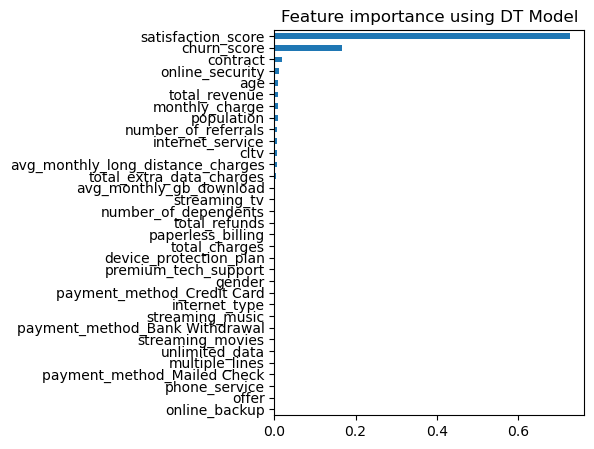

In [317]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier

def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4,5))
    imp_features.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state = 99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index = X_train.columns)
    plot_importance(feature_importances, 'DT')

def select_best_features_dt(df):
    df_pd = df.to_pandas()
    X = df_pd.drop('churn_value', axis = 1)
    y = df_pd['churn_value'].copy()
    apply_dt(X, y)



select_best_features_dt(df)

In [318]:

df_temp = df.drop(['satisfaction_score','churn_score'])

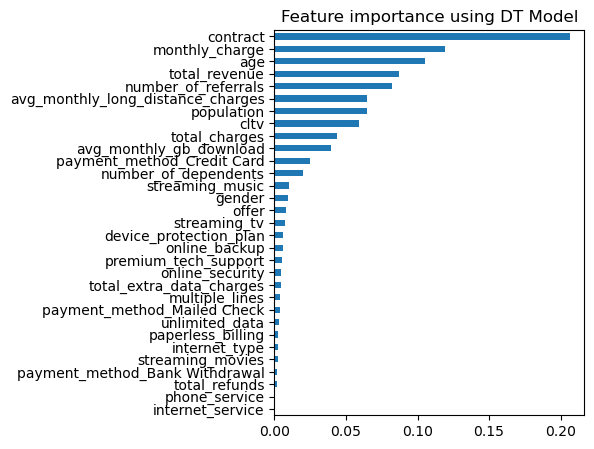

In [319]:
select_best_features_dt(df_temp)

##Title DT
number_of_referrals - YES
offer - YES
phone_service - NO
avg_monthly_long_distance_charges - YES
multiple_lines - NO
internet_service - NO
internet_type - NO
avg_monthly_gb_download - YES
online_security - NO
online_backup - NO
device_protection_plan - NO
premium_tech_support - YES
streaming_tv - NO
streaming_movies - NO
streaming_music - YES
unlimited_data - NO
contract - YES
paperless_billing - NO
payment_method_Bank Withdrawal - NO
payment_method_Credit Card - YES
payment_method_Mailed Check - NO
monthly_charge - YES
total_charges - YES
total_refunds - NO
total_extra_data_charges - NO
total_revenue - YES
gender - NO
age - YES
number_of_dependents - YES
satisfaction_score - NO
churn_value - NO
churn_score - NO
cltv - YES
population - YES

Wrapped Method

In [320]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE 

#def apply_rfe(X_train, y_train):
#    rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 5)
#    rfe.fit_transform(X = X_train, y = y_train)
#    selected_features = pd.Series(rfe.support_, index = X_train.columns)
#    print(selected_features)

#def select_best_features(X, y):
#    X_train=X
#    y_train=y
#    numerical_data = X_train.copy()
#    scaler = MinMaxScaler().fit(numerical_data)
#    X_train_scaled = scaler.transform(numerical_data)
#    X_train_scaled = pd.DataFrame(X_train_scaled, columns = numerical_data.columns)


#    print('------------------ RFE ----------------------')
#    apply_rfe(X_train, y_train)
#df_pd = df_temp.to_pandas()
#X = df_pd.drop('churn_value', axis = 1)
#y = df_pd['churn_value'].copy()

#select_best_features(X, y)


In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 

def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=8)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals           True
contract                      True
payment_method_Credit Card    True
monthly_charge                True
total_charges                 True
total_revenue                 True
age                           True
number_of_dependents          True
dtype: bool


In [322]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals           True
phone_service                 True
online_security               True
contract                      True
payment_method_Credit Card    True
monthly_charge                True
total_charges                 True
total_revenue                 True
age                           True
number_of_dependents          True
dtype: bool


In [323]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=15)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    # Escalonar os dados
    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)

------------------ RFE ----------------------
number_of_referrals            True
phone_service                  True
internet_type                  True
avg_monthly_gb_download        True
online_security                True
premium_tech_support           True
contract                       True
payment_method_Credit Card     True
payment_method_Mailed Check    True
monthly_charge                 True
total_charges                  True
total_revenue                  True
age                            True
number_of_dependents           True
population                     True
dtype: bool


In [324]:
def apply_rfe(X_train, y_train):
    model = LogisticRegression(max_iter=1000)  # evita warnings de convergência
    rfe = RFE(estimator=model, n_features_to_select=10)
    rfe.fit(X_train, y_train)
    
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features[selected_features == True])

    return selected_features

def select_best_features(X, y):

    scaler = MinMaxScaler().fit(X)
    X_scaled = scaler.transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

    print('------------------ RFE ----------------------')
    selected = apply_rfe(X_scaled, y)

    return selected

df_pd = df_temp.to_pandas()

X = df_pd.drop('churn_value', axis=1)
y = df_pd['churn_value']

selected = select_best_features(X, y)


------------------ RFE ----------------------
number_of_referrals           True
phone_service                 True
online_security               True
contract                      True
payment_method_Credit Card    True
monthly_charge                True
total_charges                 True
total_revenue                 True
age                           True
number_of_dependents          True
dtype: bool


<a class="anchor" id="1st-bullet">

3.1.5 Chisquare

In [325]:
def apply_chisquare(X, y, var, alpha=0.05):
    # Create contingency table
    dfObserved = pd.crosstab(y, X) 
    # Calculate Chi-square
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    
    # Return True if we should keep it (p-value < alpha), else False
    if p < alpha:
        print(f"{var} KEEP (p-value: {p:.4f})")
        return True
    else:
        print(f"{var} DISCARD (p-value: {p:.4f})")
        return False

def select_best_cat_features(df_pd):
    # Separate Features and Target
    X = df_pd.drop('churn_value', axis=1)
    y = df_pd['churn_value'].copy()
    
    selected_features = []
    
    # Iterate over ALL columns in X (since they are already encoded)
    for var in X.columns:
        # Optional: Skip columns that are continuous numbers (like 'TotalCharges' or 'Tenure')
        # if X[var].nunique() > 20: 
        #     continue
            
        if apply_chisquare(X[var], y, var):
            selected_features.append(var)
            
    return selected_features
    
    for var in X_train_cat:
        # If the function returns True, add to our list
        if apply_chisquare(X_train_cat[var], y, var):
            selected_features.append(var)
            
    return selected_features

# Now you can store the best features in a variable
best_features = select_best_cat_features(df_pd)
print("\nFinal Selected Features:", best_features)

number_of_referrals KEEP (p-value: 0.0000)
offer KEEP (p-value: 0.0000)
phone_service DISCARD (p-value: 0.3041)
avg_monthly_long_distance_charges DISCARD (p-value: 0.3471)
multiple_lines KEEP (p-value: 0.0010)
internet_service KEEP (p-value: 0.0000)
internet_type KEEP (p-value: 0.0000)
avg_monthly_gb_download KEEP (p-value: 0.0000)
online_security KEEP (p-value: 0.0000)
online_backup KEEP (p-value: 0.0000)
device_protection_plan KEEP (p-value: 0.0000)
premium_tech_support KEEP (p-value: 0.0000)
streaming_tv KEEP (p-value: 0.0000)
streaming_movies KEEP (p-value: 0.0000)
streaming_music KEEP (p-value: 0.0004)
unlimited_data KEEP (p-value: 0.0000)
contract KEEP (p-value: 0.0000)
paperless_billing KEEP (p-value: 0.0000)
payment_method_Bank Withdrawal KEEP (p-value: 0.0000)
payment_method_Credit Card KEEP (p-value: 0.0000)
payment_method_Mailed Check KEEP (p-value: 0.0001)
monthly_charge KEEP (p-value: 0.0000)
total_charges DISCARD (p-value: 0.4892)
total_refunds KEEP (p-value: 0.0413)
tota

Feature Selection Table
| Feature                          | Decision Tree | RFE-8 | RFE-10 | RFE-15 | Chi-Squared |
|----------------------------------|---------------|-------|--------|--------|-------------|
| number_of_referrals             | YES           | YES   | YES    | YES    | YES         |
| offer                           | YES           | NO    | NO     | NO     | YES         |
| phone_service                   | NO            | NO    | YES    | YES    | NO          |
| avg_monthly_long_distance_charges | YES         | NO    | NO     | NO     | NO          |
| multiple_lines                  | NO            | NO    | NO     | NO     | YES         |
| internet_service                | NO            | NO    | NO     | NO     | YES         |
| internet_type                   | NO            | NO    | NO     | NO     | YES         |
| avg_monthly_gb_download         | YES           | NO    | NO     | NO     | YES         |
| online_security                 | NO            | NO    | NO     | YES    | YES         |
| online_backup                   | NO            | NO    | NO     | YES    | YES         |
| device_protection_plan          | NO            | NO    | NO     | NO     | YES         |
| premium_tech_support            | YES           | NO    | NO     | YES    | YES         |
| streaming_tv                    | NO            | NO    | NO     | NO     | YES         |
| streaming_movies                | NO            | NO    | NO     | NO     | YES         |
| streaming_music                 | YES           | NO    | NO     | NO     | YES         |
| unlimited_data                  | NO            | NO    | NO     | NO     | YES         |
| contract                        | YES           | YES   | YES    | YES    | YES         |
| paperless_billing               | NO            | NO    | NO     | NO     | YES         |
| payment_method_Bank Withdrawal  | NO            | NO    | NO     | NO     | YES         |
| payment_method_Credit Card      | YES           | NO    | NO     | YES    | YES         |
| payment_method_Mailed Check     | NO            | YES   | YES    | YES    | YES         |
| monthly_charge                  | YES           | YES   | YES    | YES    | YES         |
| total_charges                   | YES           | YES   | YES    | YES    | NO          |
| total_refunds                   | NO            | YES   | YES    | YES    | YES         |
| total_extra_data_charges        | NO            | NO    | NO     | NO     | YES         |
| total_revenue                   | YES           | NO    | NO     | YES    | YES         |
| gender                          | NO            | NO    | NO     | NO     | NO          |
| age                             | YES           | YES   | YES    | YES    | YES         |
| number_of_dependents            | YES           | YES   | YES    | YES    | YES         |
| cltv                            | YES           | NO    | NO     | NO     | NO          |
| population                      | YES           | NO    | YES    | YES    | YES         |


In [329]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"
from imblearn.over_sampling import SMOTE


df_temp = df.to_pandas()

X = df_temp.drop("churn_value", axis=1)   
y = df_temp["churn_value"]                

smote = SMOTE(random_state=42)

X_res, y_res = smote.fit_resample(X, y)

df_balanced = pd.concat([X_res, y_res], axis=1)

df = pl.DataFrame(df_balanced)

In [330]:
df.select(
    pl.col('churn_value').value_counts(sort=True)
).unnest('churn_value')

churn_value,count
i64,u32
0,4158
1,4158


In [331]:
df

number_of_referrals,offer,phone_service,avg_monthly_long_distance_charges,multiple_lines,internet_service,internet_type,avg_monthly_gb_download,online_security,online_backup,device_protection_plan,premium_tech_support,streaming_tv,streaming_movies,streaming_music,unlimited_data,contract,paperless_billing,payment_method_Bank Withdrawal,payment_method_Credit Card,payment_method_Mailed Check,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_revenue,gender,age,number_of_dependents,satisfaction_score,churn_score,cltv,population,churn_value
i64,i32,i32,f64,i32,i32,i32,f64,i32,i32,i32,i32,i32,i32,i32,i32,i32,i32,u8,u8,u8,f64,f64,f64,f64,f64,i32,i64,i64,f64,i64,i64,f64,i64
1,1,1,3.272312,1,1,3,2.802039,1,0,1,1,1,1,0,1,3,1,0,0,1,4.787787,20.062596,0.0,0.0,21.96567,0,73,0,4.0,34,6010,40.58272,0
0,2,1,3.650072,0,0,3,0.0,0,0,0,0,0,0,0,0,2,1,0,0,1,2.767655,10.73947,0.0,0.0,15.82349,1,38,0,4.0,23,6473,39.593593,0
0,5,1,2.331268,0,1,3,2.714418,1,0,0,0,0,0,0,1,3,1,1,0,0,4.200227,7.6682,0.0,0.0,8.076965,0,65,0,3.0,79,4716,11.634834,0
6,4,1,3.389181,0,1,2,1.587401,0,0,1,1,0,0,0,1,1,0,1,0,0,3.785587,10.689821,0.0,0.0,12.840133,0,47,0,5.0,49,5140,8.635655,0
0,5,0,0.0,0,1,2,2.289428,1,0,0,1,0,0,0,1,2,0,0,1,0,3.241199,10.366255,0.0,0.0,10.366255,1,64,1,3.0,73,3044,14.020378,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,4,1,2.474828,0,1,3,1.998345,0,0,1,0,1,1,1,1,1,0,1,0,0,4.655983,10.834325,0.0,0.0,11.321486,0,46,0,2.240299,75,2748,36.547467,1
0,4,1,3.224295,0,1,2,2.580505,0,0,0,0,0,1,1,0,1,0,1,0,0,4.491367,11.538223,0.0,1.0,13.058334,0,64,0,2.905035,78,5830,26.5337,1
0,5,1,2.852197,0,1,3,2.410142,0,0,0,0,0,0,0,1,1,0,1,0,0,4.343031,8.232693,0.0,0.0,9.072888,0,48,0,2.685082,65,3539,16.955245,1


In [68]:
df.write_parquet(train_model_path, compression='snappy')